2. How to deal with inconsistent formats within a single column?
For the Incidence Number column, it’s important to standardize the format before merging or comparing datasets. Here's how:
1. Inspect the formats: Identify all existing patterns (e.g., decimals, integers, hyphenated numbers).
2. Standardize the format:
Convert to string: Use .astype(str) to handle mixed formats.
Remove hyphens: Replace hyphens with an appropriate delimiter or remove them entirely
(df['Incidence Number'] = df['Incidence Number'].str.replace('-', '')).
Handle decimals and integers: Use .astype(float) or .astype(int) if applicable.
3. Check for unique matches: Ensure the column is consistently formatted in both datasets before merging.
4. Perform the merge: Once standardized, you can merge the datasets using the cleaned Incidence Number.

In [2]:
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import seaborn as sns
import re
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'notebook'

In [3]:
old_incidents=pd.read_csv("LFB Incident data from 2009 - 2017.csv", sep=',', low_memory=False)

In [4]:
old_incidents.head(5)

IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall    IncidentGroup  \
0   235138081.00  01-Jan-09     2009   00:00:37           0  Special Service   
1        1091.00  01-Jan-09     2009   00:00:46           0  Special Service   
2        2091.00  01-Jan-09     2009   00:03:00           0             Fire   
3        3091.00  01-Jan-09     2009   00:04:27           0             Fire   
4        5091.00  01-Jan-09     2009   00:05:39           0             Fire   

  StopCodeDescription     SpecialServiceType PropertyCategory  \
0     Special Service                    RTC     Road Vehicle   
1     Special Service  Assist other agencies          Outdoor   
2      Secondary Fire                    NaN          Outdoor   
3      Secondary Fire                    NaN          Outdoor   
4      Secondary Fire                    NaN          Outdoor   

                                  PropertyType  \
0                                         Car    
1                         Lake/pond/reservoir    
2                       Road surface/pavement    
3  Domestic garden (vegetation not equipment)    
4        Cycle path/public footpath/bridleway    

                               AddressQualifier Postcode_full  \
0         In street close to gazetteer location      SW11 4LB   
1  Open land/water - nearest gazetteer location       SE1 7SG   
2          In street outside gazetteer location        N9 9EL   
3              On land associated with building      UB10 0DG   
4          In street outside gazetteer location        N7 8HG   

  Postcode_district          UPRN        USRN IncGeo_BoroughCode  \
0              SW11           NaN         NaN          E09000032   
1               SE1           NaN         NaN          E09000022   
2                N9           NaN         NaN          E09000010   
3              UB10  1.000215e+11  21401491.0          E09000017   
4                N7           NaN         NaN          E09000019   

  IncGeo_BoroughName  ProperCase IncGeo_WardCode        IncGeo_WardName  \
0         WANDSWORTH  Wandsworth       E05014010         Battersea Park   
1            LAMBETH     Lambeth       E05014118  Waterloo & South Bank   
2            ENFIELD     Enfield       E05013682              Haselbury   
3         HILLINGDON  Hillingdon       E05013571        Hillingdon East   
4          ISLINGTON   Islington       E05013708                Laycock   

      IncGeo_WardNameNew  Easting_m  Northing_m  Easting_rounded  \
0         Battersea Park   528652.0    176830.0           528650   
1  Waterloo & South Bank   530485.0    179007.0           530450   
2              Haselbury   533773.0    194492.0           533750   
3        Hillingdon East   507738.0    182805.0           507750   
4                Laycock   531058.0    185307.0           531050   

   Northing_rounded   Latitude  Longitude     FRS IncidentStationGround  \
0            176850  51.475812  -0.148894  London             Battersea   
1            179050  51.494957  -0.121712  London               Lambeth   
2            194450  51.633342  -0.068488  London              Edmonton   
3            182850  51.533882  -0.448089  London            Hillingdon   
4            185350  51.551441  -0.111120  London              Holloway   

   FirstPumpArriving_AttendanceTime FirstPumpArriving_DeployedFromStation  \
0                             319.0                             Battersea   
1                               NaN                                   NaN   
2                             308.0                              Edmonton   
3                             210.0                            Hillingdon   
4                             233.0                              Holloway   

   SecondPumpArriving_AttendanceTime SecondPumpArriving_DeployedFromStation  \
0                              342.0                                Clapham   
1                                NaN                                    NaN   
2                 

In [5]:
old_incidents.describe()

CalYear     HourOfCall          UPRN          USRN      Easting_m  \
count  988279.00000  988279.000000  8.469460e+05  8.254080e+05  536765.000000   
mean     2012.76622      13.536951  2.384434e+10  2.022355e+07  530633.484454   
std         2.63804       6.212017  4.956566e+10  4.168085e+06   10284.552338   
min      2009.00000       0.000000  0.000000e+00  0.000000e+00  503588.000000   
25%      2010.00000       9.000000  0.000000e+00  2.040093e+07  525310.000000   
50%      2013.00000      14.000000  0.000000e+00  2.120135e+07  530782.000000   
75%      2015.00000      19.000000  1.001541e+10  2.210219e+07  536754.000000   
max      2017.00000      23.000000  2.000044e+11  9.999012e+07  560925.000000   

          Northing_m  Easting_rounded  Northing_rounded       Latitude  \
count  536765.000000    988279.000000     988279.000000  536765.000000   
mean   180368.499848    530686.961931     180520.003714      51.507063   
std      7402.412987      9715.709862       7302.075183       0.066370   
min    156761.000000    503550.000000     156750.000000      51.292502   
25%    176058.000000    525350.000000     176250.000000      51.470002   
50%    180988.000000    530950.000000     181050.000000      51.512941   
75%    184866.000000    536250.000000     185150.000000      51.547217   
max    200906.000000    560950.000000     200950.000000      51.691670   

           Longitude  FirstPumpArriving_AttendanceTime  \
count  536765.000000                     896908.000000   
mean       -0.119058                        321.645404   
std         0.148365                        142.983902   
min        -0.510046                          1.000000   
25%        -0.196091                        231.000000   
50%        -0.117313                        297.000000   
75%        -0.030318                        381.000000   
max         0.319743                       1200.000000   

       SecondPumpArriving_AttendanceTime  NumStationsWithPumpsAttending  \
count                      346421.000000                  982763.000000   
mean                          396.308734                       1.346172   
std                           158.062245                       0.603609   
min                             2.000000                       1.000000   
25%                           291.000000                       1.000000   
50%                           367.000000                       1.000000   
75%                           466.000000                       2.000000   
max                          1200.000000                      46.000000   

       NumPumpsAttending      PumpCount  PumpMinutesRounded  \
count      982763.000000  988279.000000       988279.000000   
mean            1.557269       1.587745           76.040382   
std             0.785816       1.660304          707.158906   
min             1.000000       1.000000           60.000000   
25%             1.000000       1.000000           60.000000   
50%             1.000000       1.000000           60.000000   
75%             2.000000       2.000000           60.000000   
max           106.000000     951.000000       525629.000000   

       Notional Cost (£)       NumCalls  
count       9.882790e+05  986451.000000  
mean        3.581158e+02       1.341811  
std         3.221685e+03       1.466530  
min         2.550000e+02       1.000000  
25%         2.600000e+02       1.000000  
50%         2.900000e+02       1.000000  
75%         3.260000e+02       1.000000  
max         2.277726e+06     369.000000

In [6]:
old_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988279 entries, 0 to 988278
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          988279 non-null  object 
 1   DateOfCall                              988279 non-null  object 
 2   CalYear                                 988279 non-null  int64  
 3   TimeOfCall                              988279 non-null  object 
 4   HourOfCall                              988279 non-null  int64  
 5   IncidentGroup                           988279 non-null  object 
 6   StopCodeDescription                     988279 non-null  object 
 7   SpecialServiceType                      299101 non-null  object 
 8   PropertyCategory                        988279 non-null  object 
 9   PropertyType                            988279 non-null  object 
 10  AddressQualifier                        9882

In [7]:
recent_incidents=pd.read_csv("LFB Incident data from 2018 onwards.csv", sep=',', low_memory=False)

In [8]:
recent_incidents.head(5)

IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall  \
0  000008-01012018  01-Jan-18     2018   00:04:25           0   
1  000009-01012018  01-Jan-18     2018   00:04:30           0   
2  000010-01012018  01-Jan-18     2018   00:04:34           0   
3  000011-01012018  01-Jan-18     2018   00:04:58           0   
4  000014-01012018  01-Jan-18     2018   00:07:47           0   

     IncidentGroup StopCodeDescription SpecialServiceType   PropertyCategory  \
0      False Alarm                 AFA                NaN    Non Residential   
1      False Alarm                 AFA                NaN    Non Residential   
2             Fire      Secondary Fire                NaN  Outdoor Structure   
3  Special Service     Special Service                RTC       Road Vehicle   
4             Fire        Primary Fire                NaN       Road Vehicle   

                       PropertyType                      AddressQualifier  \
0                           Mosque                   Within same building   
1                 Pub/wine bar/bar              Correct incident location   
2  Common external bin storage area      On land associated with building   
3                Multiple Vehicles   In street outside gazetteer location   
4                              Car   In street outside gazetteer location   

  Postcode_full Postcode_district          UPRN      USRN IncGeo_BoroughCode  \
0        N2 8AY                N2     200220110  20013420          E09000003   
1       BR3 1ED               BR3  100022892766  20301747          E09000006   
2       N13 5SX               N13     207086892  20704500          E09000010   
3       EN1 4LD               EN1     207153957  20702569          E09000010   
4       E15 1QY               E15   10023996788  22200068          E09000025   

  IncGeo_BoroughName ProperCase IncGeo_WardCode               IncGeo_WardName  \
0             BARNET     Barnet       E05013636                 East Finchley   
1            BROMLEY    Bromley       E05013987  Beckenham Town & Copers Cope   
2            ENFIELD    Enfield       E05013683                     Highfield   
3            ENFIELD    Enfield       E05013677                   Carterhatch   
4             NEWHAM     Newham       E05013917                      Maryland   

             IncGeo_WardNameNew  Easting_m  Northing_m  Easting_rounded  \
0                 East Finchley   527184.0    189488.0           527150   
1  Beckenham Town & Copers Cope   537430.0    169565.0           537450   
2                     Highfield   531901.0    193161.0           531950   
3                   Carterhatch   534799.0    197474.0           534750   
4                      Maryland   539451.0    185362.0           539450   

   Northing_rounded   Latitude  Longitude     FRS IncidentStationGround  \
0            189450  51.589900  -0.165453  London              Finchley   
1            169550  51.408463  -0.025394  London             Beckenham   
2            193150  51.621823  -0.096022  London              Edmonton   
3            197450  51.659894  -0.052524  London               Enfield   
4            185350  51.549924   0.009877  London             Stratford   

   FirstPumpArriving_AttendanceTime FirstPumpArriving_DeployedFromStation  \
0                             348.0                              Finchley   
1                             144.0                             Beckenham   
2                             232.0                             Southgate   
3                              22.0                               Enfield   
4                             241.0                             Stratford   

   SecondPumpArriving_AttendanceTime SecondPumpArriving_DeployedFromStation  \
0                                NaN                                    NaN   
1                                NaN                                    NaN   
2                                NaN                                    NaN   
3                   

In [9]:
recent_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805036 entries, 0 to 805035
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          805036 non-null  object 
 1   DateOfCall                              805036 non-null  object 
 2   CalYear                                 805036 non-null  int64  
 3   TimeOfCall                              805036 non-null  object 
 4   HourOfCall                              805036 non-null  int64  
 5   IncidentGroup                           805030 non-null  object 
 6   StopCodeDescription                     805036 non-null  object 
 7   SpecialServiceType                      285714 non-null  object 
 8   PropertyCategory                        805030 non-null  object 
 9   PropertyType                            805030 non-null  object 
 10  AddressQualifier                        8050

In [10]:
all_incidents=pd.concat([old_incidents, recent_incidents], axis=0) #Concatenate both dataframes, to get continuous data from 2009-2024.

all_incidents[["Latitude", "Longitude"]] = all_incidents[["Latitude", "Longitude"]].astype(str)
all_incidents.info()

all_incidents["Coordinates"]= all_incidents[["Latitude", "Longitude"]].apply(",".join, axis=1)

In [13]:
all_incidents['Latitude'].nunique()

573689

In [14]:
all_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793315 entries, 0 to 805035
Data columns (total 39 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   IncidentNumber                          object 
 1   DateOfCall                              object 
 2   CalYear                                 int64  
 3   TimeOfCall                              object 
 4   HourOfCall                              int64  
 5   IncidentGroup                           object 
 6   StopCodeDescription                     object 
 7   SpecialServiceType                      object 
 8   PropertyCategory                        object 
 9   PropertyType                            object 
 10  AddressQualifier                        object 
 11  Postcode_full                           object 
 12  Postcode_district                       object 
 13  UPRN                                    float64
 14  USRN                                    

In [15]:
all_incidents.describe()

CalYear    HourOfCall          UPRN          USRN      Easting_m  \
count  1.793315e+06  1.793315e+06  1.651982e+06  1.630444e+06  894180.000000   
mean   2.016548e+03  1.346681e+01  2.183224e+10  2.031646e+07  530632.157642   
std    4.819181e+00  6.254862e+00  4.744677e+10  4.377518e+06   10337.775068   
min    2.009000e+03  0.000000e+00  0.000000e+00  0.000000e+00  503582.000000   
25%    2.012000e+03  9.000000e+00  0.000000e+00  2.040096e+07  525183.000000   
50%    2.017000e+03  1.400000e+01  0.000000e+00  2.120128e+07  530796.000000   
75%    2.021000e+03  1.900000e+01  1.001315e+10  2.210114e+07  536834.000000   
max    2.024000e+03  2.300000e+01  2.000044e+11  9.999042e+07  561126.000000   

          Northing_m  Easting_rounded  Northing_rounded       Latitude  \
count  894180.000000     1.793315e+06      1.793315e+06  894180.000000   
mean   180365.720450     5.306580e+05      1.804867e+05      51.444898   
std      7434.978204     9.725041e+03      7.358044e+03       1.789388   
min    155901.000000     5.035500e+05      1.559500e+05       0.000000   
25%    175991.000000     5.252500e+05      1.761500e+05      51.468961   
50%    180982.000000     5.309500e+05      1.810500e+05      51.512881   
75%    184943.000000     5.362500e+05      1.851500e+05      51.547780   
max    200906.000000     6.111500e+05      3.024500e+05      51.691670   

           Longitude  FirstPumpArriving_AttendanceTime  \
count  894180.000000                      1.656519e+06   
mean       -0.118839                      3.183722e+02   
std         0.149006                      1.386455e+02   
min        -0.510155                      1.000000e+00   
25%        -0.197464                      2.310000e+02   
50%        -0.116993                      2.970000e+02   
75%        -0.028672                      3.780000e+02   
max         0.322219                      1.200000e+03   

       SecondPumpArriving_AttendanceTime  NumStationsWithPumpsAttending  \
count                      641917.000000                   1.779008e+06   
mean                          395.606510                   1.370065e+00   
std                           153.294613                   6.854201e-01   
min                             1.000000                   1.000000e+00   
25%                           295.000000                   1.000000e+00   
50%                           369.000000                   1.000000e+00   
75%                           464.000000                   2.000000e+00   
max                          1200.000000                   4.600000e+01   

       NumPumpsAttending     PumpCount  PumpMinutesRounded  Notional Cost (£)  \
count       1.779008e+06  1.793315e+06        1.793315e+06       1.793315e+06   
mean        1.554517e+00  1.591982e+00        7.625252e+01       4.054220e+02   
std         8.430744e-01  1.582282e+00        5.646239e+02       2.696265e+03   
min         1.000000e+00  1.000000e+00        6.000000e+01       2.550000e+02   
25%         1.000000e+00  1.000000e+00        6.000000e+01       2.690000e+02   
50%         1.000000e+00  1.000000e+00        6.000000e+01       3.280000e+02   
75%         2.000000e+00  2.000000e+00        6.000000e+01       3.640000e+02   
max         1.060000e+02  9.510000e+02        5.256290e+05       2.277726e+06   

           NumCalls  
count  1.791466e+06  
mean   1.328686e+00  
std    1.484632e+00  
min    1.000000e+00  
25%    1.000000e+00  
50%    1.000000e+00  
75%    1.000000e+00  
max    3.690000e+02

In [16]:
all_incidents['Latitude'].dtype

dtype('float64')

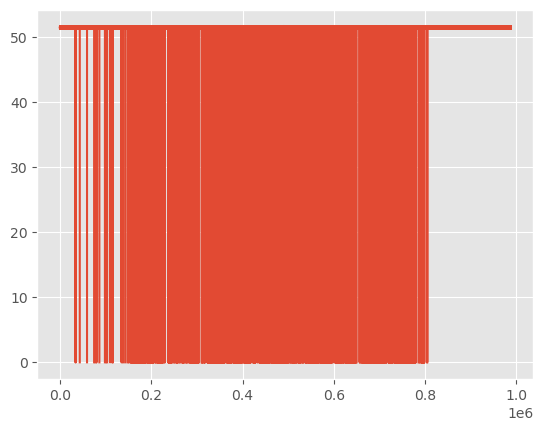

In [17]:
plt.plot(all_incidents['Latitude'])
plt.show(plt)

In [18]:
all_incidents.head(15)

IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall    IncidentGroup  \
0    235138081.00  01-Jan-09     2009   00:00:37           0  Special Service   
1         1091.00  01-Jan-09     2009   00:00:46           0  Special Service   
2         2091.00  01-Jan-09     2009   00:03:00           0             Fire   
3         3091.00  01-Jan-09     2009   00:04:27           0             Fire   
4         5091.00  01-Jan-09     2009   00:05:39           0             Fire   
5         6091.00  01-Jan-09     2009   00:06:03           0      False Alarm   
6         8091.00  01-Jan-09     2009   00:12:31           0  Special Service   
7         9091.00  01-Jan-09     2009   00:13:42           0             Fire   
8        10091.00  01-Jan-09     2009   00:14:51           0             Fire   
9        11091.00  01-Jan-09     2009   00:14:57           0      False Alarm   
10       12091.00  01-Jan-09     2009   00:16:02           0             Fire   
11       14091.00  01-Jan-09     2009   00:17:58           0  Special Service   
12       15091.00  01-Jan-09     2009   00:19:00           0             Fire   
13       21091.00  01-Jan-09     2009   00:20:43           0  Special Service   
14       20091.00  01-Jan-09     2009   00:23:28           0      False Alarm   

   StopCodeDescription     SpecialServiceType   PropertyCategory  \
0      Special Service                    RTC       Road Vehicle   
1      Special Service  Assist other agencies            Outdoor   
2       Secondary Fire                    NaN            Outdoor   
3       Secondary Fire                    NaN            Outdoor   
4       Secondary Fire                    NaN            Outdoor   
5                  AFA                    NaN           Dwelling   
6      Special Service                    RTC       Road Vehicle   
7       Secondary Fire                    NaN  Outdoor Structure   
8       Secondary Fire                    NaN  Outdoor Structure   
9                  AFA                    NaN  Other Residential   
10        Primary Fire                    NaN           Dwelling   
11     Special Service               Flooding           Dwelling   
12      Secondary Fire                    NaN            Outdoor   
13     Special Service       Medical Incident            Outdoor   
14                 AFA                    NaN    Non Residential   

                                         PropertyType  \
0                                                Car    
1                                Lake/pond/reservoir    
2                              Road surface/pavement    
3         Domestic garden (vegetation not equipment)    
4               Cycle path/public footpath/bridleway    
5   Purpose Built Flats/Maisonettes - Up to 3 stor...   
6                                                Car    
7                                 Refuse/rubbish tip    
8                      Small refuse/rubbish container   
9                          Student Hall of Residence    
10                          House - single occupancy    
11       Converted Flat/Maisonette - Up to 2 storeys    
12                                      Loose refuse    
13                             Road surface/pavement    
14                                  Department Store    

                                AddressQualifier Postcode_full  \
0          In street close to gazetteer location      SW11 4LB   
1   Open land/water - nearest gazetteer location       SE1 7SG   
2           In street outside gazetteer location        N9 9EL   
3               On land associated with building      UB10 0DG   
4           In street outside gazetteer location        N7 8HG   
5                      Correct incident location           NaN   
6                    On motorway / elevated road       SE3 9PP   
7               On land associated with building       TW3 2RE   
8               On land associated with building      EC1V 7PB   
9                      Correct incident loca

def process_dataframe(df):
    failed_reverse_geocode = []
    def get_departure_address(row):
        time.sleep(2)
        address = reverse_geocode(row['Latitude'], row['Longitude'])
        if address is None:
            failed_reverse_geocode.append((row['Latitude'], row['Longitude']))
            return address
    all_incidents['departure_address'] = all_incidents.apply(get_departure_address, axis =1)
    all_incidents['distance_to_target']= all_incidents.apply(lambda row: calculate_distance(row['Latitude'], row['Longitude'], row['Postcode_full']),axis = 1)
    print(f"Failed reverse geocoding for coordinates: {failed_reverse_geocode}")
    return all_incidents




    all_incidents['departure_address'] = all_incidents.apply(lambda row: reverse_geocode(row['Latitude'], row['Longitude']), axis = 1)
    all_incidents['distance_to_target'] = all_incidents.apply(lambda row: calculate_distance(row['Latitude'], row['Longitude'], row['Postcode_full']),axis = 1)
    return all_incidents

In [21]:
all_incidents.head(15)

IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall    IncidentGroup  \
0    235138081.00  01-Jan-09     2009   00:00:37           0  Special Service   
1         1091.00  01-Jan-09     2009   00:00:46           0  Special Service   
2         2091.00  01-Jan-09     2009   00:03:00           0             Fire   
3         3091.00  01-Jan-09     2009   00:04:27           0             Fire   
4         5091.00  01-Jan-09     2009   00:05:39           0             Fire   
5         6091.00  01-Jan-09     2009   00:06:03           0      False Alarm   
6         8091.00  01-Jan-09     2009   00:12:31           0  Special Service   
7         9091.00  01-Jan-09     2009   00:13:42           0             Fire   
8        10091.00  01-Jan-09     2009   00:14:51           0             Fire   
9        11091.00  01-Jan-09     2009   00:14:57           0      False Alarm   
10       12091.00  01-Jan-09     2009   00:16:02           0             Fire   
11       14091.00  01-Jan-09     2009   00:17:58           0  Special Service   
12       15091.00  01-Jan-09     2009   00:19:00           0             Fire   
13       21091.00  01-Jan-09     2009   00:20:43           0  Special Service   
14       20091.00  01-Jan-09     2009   00:23:28           0      False Alarm   

   StopCodeDescription     SpecialServiceType   PropertyCategory  \
0      Special Service                    RTC       Road Vehicle   
1      Special Service  Assist other agencies            Outdoor   
2       Secondary Fire                    NaN            Outdoor   
3       Secondary Fire                    NaN            Outdoor   
4       Secondary Fire                    NaN            Outdoor   
5                  AFA                    NaN           Dwelling   
6      Special Service                    RTC       Road Vehicle   
7       Secondary Fire                    NaN  Outdoor Structure   
8       Secondary Fire                    NaN  Outdoor Structure   
9                  AFA                    NaN  Other Residential   
10        Primary Fire                    NaN           Dwelling   
11     Special Service               Flooding           Dwelling   
12      Secondary Fire                    NaN            Outdoor   
13     Special Service       Medical Incident            Outdoor   
14                 AFA                    NaN    Non Residential   

                                         PropertyType  \
0                                                Car    
1                                Lake/pond/reservoir    
2                              Road surface/pavement    
3         Domestic garden (vegetation not equipment)    
4               Cycle path/public footpath/bridleway    
5   Purpose Built Flats/Maisonettes - Up to 3 stor...   
6                                                Car    
7                                 Refuse/rubbish tip    
8                      Small refuse/rubbish container   
9                          Student Hall of Residence    
10                          House - single occupancy    
11       Converted Flat/Maisonette - Up to 2 storeys    
12                                      Loose refuse    
13                             Road surface/pavement    
14                                  Department Store    

                                AddressQualifier Postcode_full  \
0          In street close to gazetteer location      SW11 4LB   
1   Open land/water - nearest gazetteer location       SE1 7SG   
2           In street outside gazetteer location        N9 9EL   
3               On land associated with building      UB10 0DG   
4           In street outside gazetteer location        N7 8HG   
5                      Correct incident location           NaN   
6                    On motorway / elevated road       SE3 9PP   
7               On land associated with building       TW3 2RE   
8               On land associated with building      EC1V 7PB   
9                      Correct incident loca

In [22]:
all_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793315 entries, 0 to 805035
Data columns (total 39 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   IncidentNumber                          object 
 1   DateOfCall                              object 
 2   CalYear                                 int64  
 3   TimeOfCall                              object 
 4   HourOfCall                              int64  
 5   IncidentGroup                           object 
 6   StopCodeDescription                     object 
 7   SpecialServiceType                      object 
 8   PropertyCategory                        object 
 9   PropertyType                            object 
 10  AddressQualifier                        object 
 11  Postcode_full                           object 
 12  Postcode_district                       object 
 13  UPRN                                    float64
 14  USRN                                    

In [23]:
LFB_addresses = pd.read_csv("LFB_stations_addresses.csv", sep = ';')
LFB_addresses.head()

Direction        London_Borough     Fire_station  \
0  North East  Barking and Dagenham          Barking   
1  North East  Barking and Dagenham         Dagenham   
2  North East                  City             City   
3  North East               Hackney       Shoreditch   
4  North East               Hackney  Stoke Newington   

                         FireStation_Address   Latitude  Longitude  
0                     Alfred's Way, IG11 0BB  51.529820   0.088809  
1  70 Rainham Road North, Dagenham, RM10 7ES  51.559507   0.156780  
2        94-95 Upper Thames Street, EC4R 3UE  51.510003  -0.090206  
3                   235 Old Street, EC1V 9EY  51.526625  -0.084321  
4  64 Stoke Newington Church Street, N16 0AR  51.562056  -0.076530

In [24]:
import datetime
all_incidents.infer_datetime_format=True
all_incidents['DateOfCall'] = pd.to_datetime(all_incidents['DateOfCall'], errors='coerce')
all_incidents['Weekday'] = all_incidents['DateOfCall'].dt.strftime('%A') #get weekday
all_incidents.head(5)

C:\Users\Thesa\AppData\Local\Temp\ipykernel_13440\2716084436.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall    IncidentGroup  \
0   235138081.00 2009-01-01     2009   00:00:37           0  Special Service   
1        1091.00 2009-01-01     2009   00:00:46           0  Special Service   
2        2091.00 2009-01-01     2009   00:03:00           0             Fire   
3        3091.00 2009-01-01     2009   00:04:27           0             Fire   
4        5091.00 2009-01-01     2009   00:05:39           0             Fire   

  StopCodeDescription     SpecialServiceType PropertyCategory  \
0     Special Service                    RTC     Road Vehicle   
1     Special Service  Assist other agencies          Outdoor   
2      Secondary Fire                    NaN          Outdoor   
3      Secondary Fire                    NaN          Outdoor   
4      Secondary Fire                    NaN          Outdoor   

                                  PropertyType  \
0                                         Car    
1                         Lake/pond/reservoir    
2                       Road surface/pavement    
3  Domestic garden (vegetation not equipment)    
4        Cycle path/public footpath/bridleway    

                               AddressQualifier Postcode_full  \
0         In street close to gazetteer location      SW11 4LB   
1  Open land/water - nearest gazetteer location       SE1 7SG   
2          In street outside gazetteer location        N9 9EL   
3              On land associated with building      UB10 0DG   
4          In street outside gazetteer location        N7 8HG   

  Postcode_district          UPRN        USRN IncGeo_BoroughCode  \
0              SW11           NaN         NaN          E09000032   
1               SE1           NaN         NaN          E09000022   
2                N9           NaN         NaN          E09000010   
3              UB10  1.000215e+11  21401491.0          E09000017   
4                N7           NaN         NaN          E09000019   

  IncGeo_BoroughName  ProperCase IncGeo_WardCode        IncGeo_WardName  \
0         WANDSWORTH  Wandsworth       E05014010         Battersea Park   
1            LAMBETH     Lambeth       E05014118  Waterloo & South Bank   
2            ENFIELD     Enfield       E05013682              Haselbury   
3         HILLINGDON  Hillingdon       E05013571        Hillingdon East   
4          ISLINGTON   Islington       E05013708                Laycock   

      IncGeo_WardNameNew  Easting_m  Northing_m  Easting_rounded  \
0         Battersea Park   528652.0    176830.0           528650   
1  Waterloo & South Bank   530485.0    179007.0           530450   
2              Haselbury   533773.0    194492.0           533750   
3        Hillingdon East   507738.0    182805.0           507750   
4                Laycock   531058.0    185307.0           531050   

   Northing_rounded   Latitude  Longitude     FRS IncidentStationGround  \
0            176850  51.475812  -0.148894  London             Battersea   
1            179050  51.494957  -0.121712  London               Lambeth   
2            194450  51.633342  -0.068488  London              Edmonton   
3            182850  51.533882  -0.448089  London            Hillingdon   
4            185350  51.551441  -0.111120  London              Holloway   

   FirstPumpArriving_AttendanceTime FirstPumpArriving_DeployedFromStation  \
0                             319.0                             Battersea   
1                               NaN                                   NaN   
2                             308.0                              Edmonton   
3                             210.0                            Hillingdon   
4                             233.0                              Holloway   

   SecondPumpArriving_AttendanceTime SecondPumpArriving_DeployedFromStation  \
0                              342.0                                Clapham   
1                                NaN                                    NaN   
2                 

In [25]:
all_incidents["Month"] = pd.to_datetime(all_incidents['DateOfCall']).dt.month #get month
all_incidents["Day"] = pd.to_datetime(all_incidents['DateOfCall']).dt.day         #get day           

In [26]:
all_incidents_counts = all_incidents['CalYear'].value_counts().sort_index()

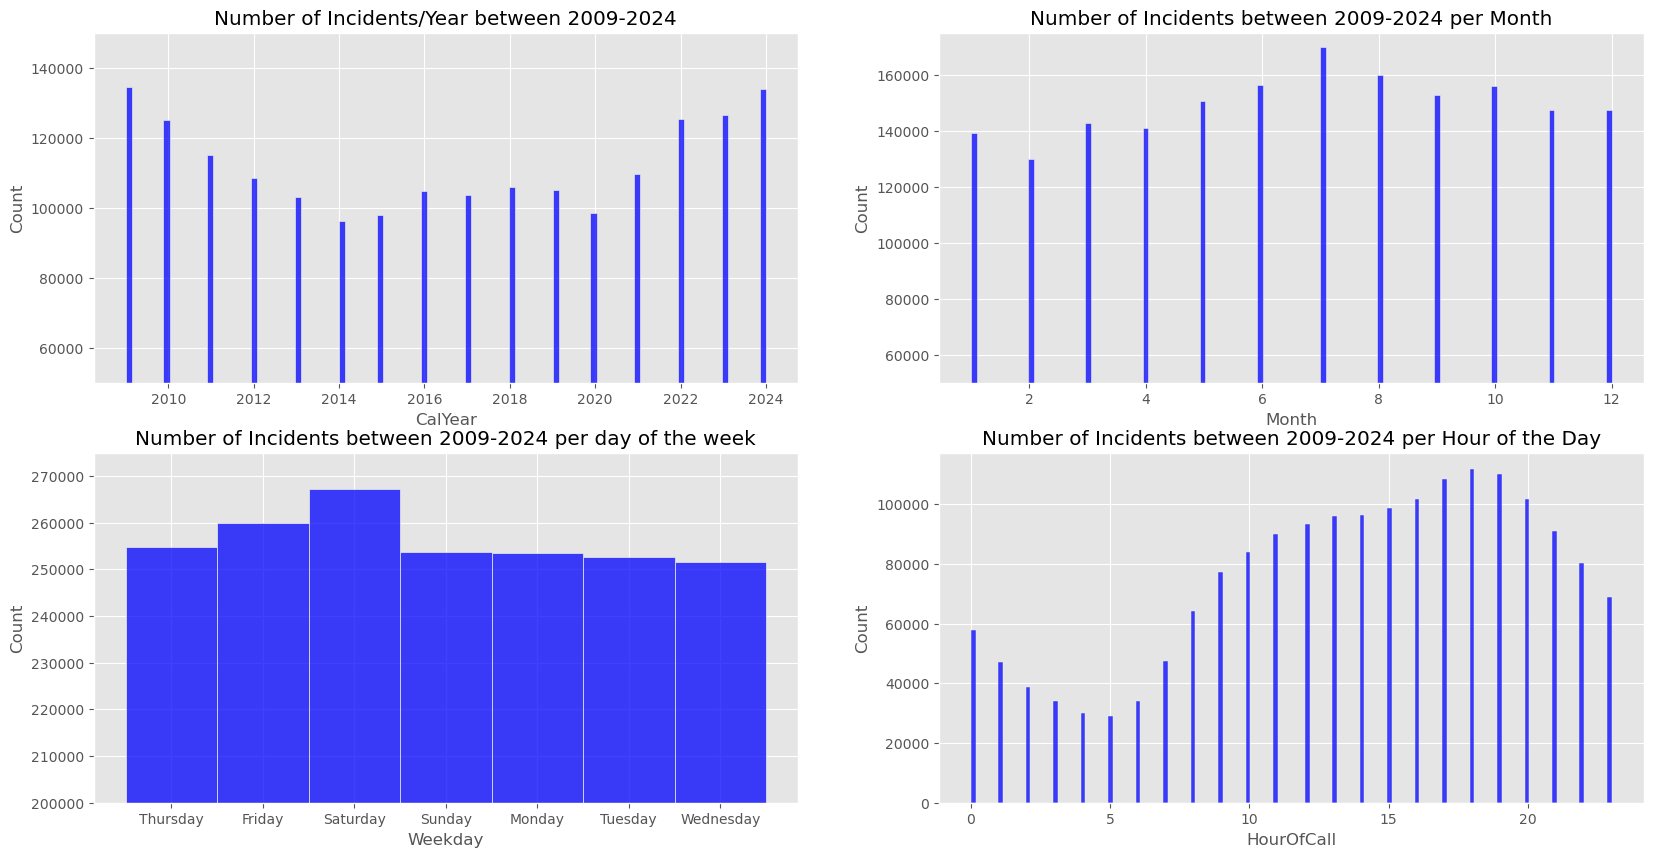

In [27]:
plt.figure(figsize = (20,10))

plt.subplot(221)
sns.histplot(all_incidents['CalYear'], color = 'blue')
plt.ylim(50000, 150000)
plt.title("Number of Incidents/Year between 2009-2024")
plt.subplot(222)
sns.histplot(all_incidents['Month'], color = 'blue')
plt.ylim(50000, 175000)
plt.title("Number of Incidents between 2009-2024 per Month")
plt.subplot(223)
sns.histplot(all_incidents['Weekday'], color = 'blue')
plt.ylim(200000, 275000)
plt.title("Number of Incidents between 2009-2024 per day of the week")
plt.subplot(224)
sns.histplot(all_incidents['HourOfCall'], color = 'blue')
plt.title("Number of Incidents between 2009-2024 per Hour of the Day")
plt.show(sns)

#PS: would have liked to show hue = IncidentGroup or Property type ect, but get error message that hue not possible with wide-format data. Haven't found a solution as of yet.

In [28]:
import scipy.stats

In [29]:
print(all_incidents['PropertyType'].value_counts())

PropertyType
Purpose Built Flats/Maisonettes - 4 to 9 storeys      226712
House - single occupancy                              202175
Purpose Built Flats/Maisonettes - Up to 3 storeys     172886
Self contained Sheltered Housing                       88392
Car                                                    80554
                                                       ...  
Greenhouse (commercial) polytunnel                         3
Military helicopter                                        2
Racecourse                                                 2
Silo                                                       1
Military plane                                             1
Name: count, Length: 292, dtype: int64


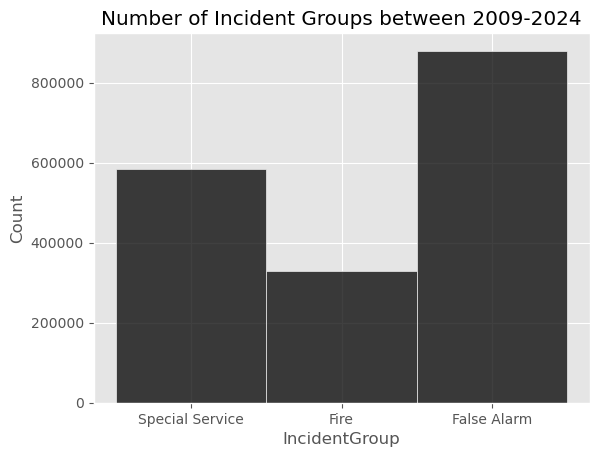

In [30]:
sns.histplot(all_incidents['IncidentGroup'], color = 'black')
plt.title("Number of Incident Groups between 2009-2024")
plt.show(sns)

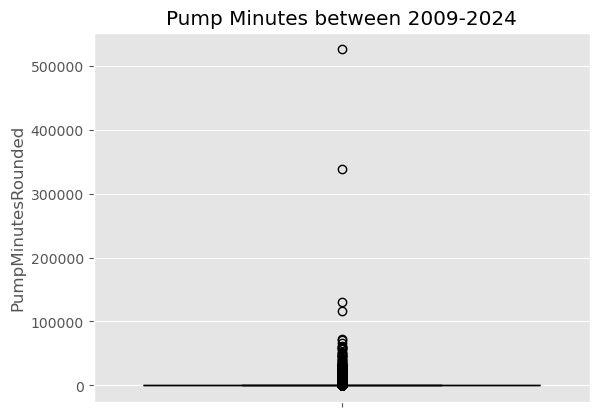

In [31]:
sns.boxplot(all_incidents['PumpMinutesRounded'], color = 'black')
plt.title("Pump Minutes between 2009-2024")
plt.show(sns)

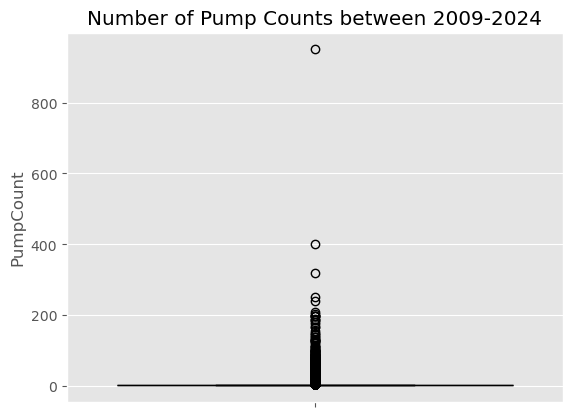

In [32]:
sns.boxplot(all_incidents['PumpCount'], color = 'black')
plt.title("Number of Pump Counts between 2009-2024")
plt.show(sns)

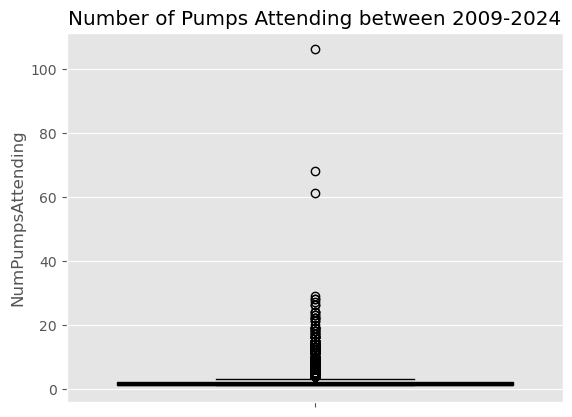

In [33]:
sns.boxplot(all_incidents['NumPumpsAttending'], color = 'black')
plt.title("Number of Pumps Attending between 2009-2024")
plt.show(sns)

In [34]:
print(all_incidents['PropertyCategory'].value_counts())
print(all_incidents['PropertyCategory'].value_counts().sum())
print(all_incidents['PropertyType'].value_counts())

PropertyCategory
Dwelling             891123
Non Residential      409791
Outdoor              152591
Road Vehicle         129807
Other Residential    106503
Outdoor Structure     99771
Rail Vehicle           1492
Aircraft               1263
Boat                    968
Name: count, dtype: int64
1793309
PropertyType
Purpose Built Flats/Maisonettes - 4 to 9 storeys      226712
House - single occupancy                              202175
Purpose Built Flats/Maisonettes - Up to 3 storeys     172886
Self contained Sheltered Housing                       88392
Car                                                    80554
                                                       ...  
Greenhouse (commercial) polytunnel                         3
Military helicopter                                        2
Racecourse                                                 2
Silo                                                       1
Military plane                                             1
Name: count, 

     IncidentGroup        sum      mean       std
0      False Alarm  1009274.0  1.149199  0.446029
1             Fire   690466.0  2.102202  3.217920
2  Special Service   680550.0  1.163791  0.475309
     IncidentGroup        sum      mean       std
0      False Alarm  1009274.0  1.149199  0.446029
1             Fire   690466.0  2.102202  3.217920
2  Special Service   680550.0  1.163791  0.475309


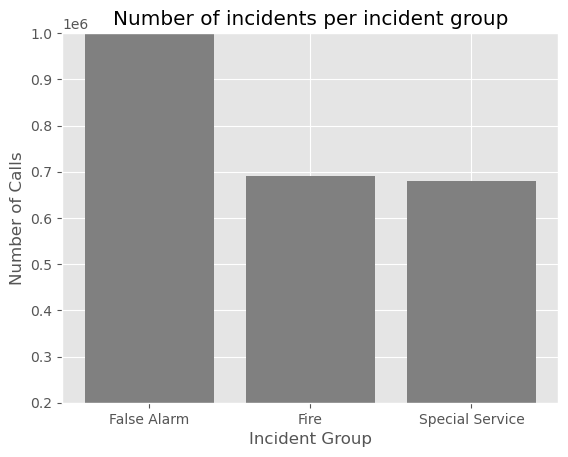

In [35]:
grouped_incidents = all_incidents.groupby('IncidentGroup')['NumCalls'].agg(['sum', 'mean', 'std'])
grouped_incidents_reset=grouped_incidents.reset_index()
print(grouped_incidents_reset.head())
print(grouped_incidents_reset)
plt.bar(grouped_incidents_reset['IncidentGroup'], grouped_incidents_reset['sum'], color='gray')
plt.xlabel('Incident Group')
plt.ylabel('Number of Calls')
plt.ylim([200000, 1000000])
plt.title("Number of incidents per incident group")
plt.show(plt)

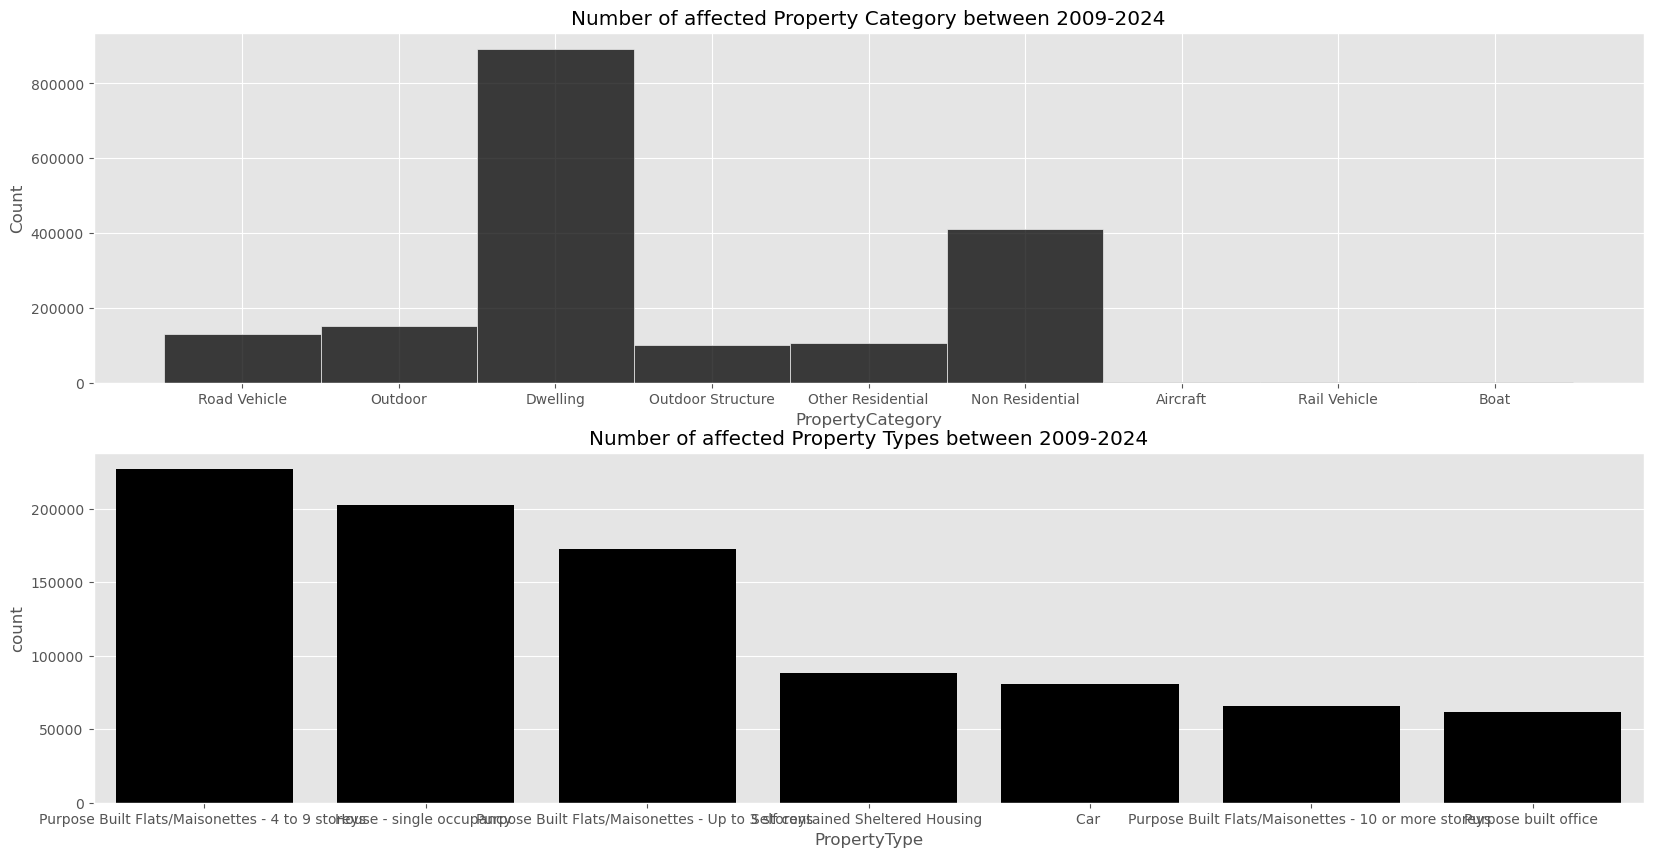

In [36]:
plt.figure(figsize = (20,10))
plt.subplot(211)
sns.histplot(all_incidents['PropertyCategory'], color = 'black')
plt.title("Number of affected Property Category between 2009-2024")
plt.subplot(212)
sns.barplot(x=all_incidents['PropertyType'].value_counts().head(7).index, y=all_incidents['PropertyType'].value_counts().head(7), color='black')
plt.title("Number of affected Property Types between 2009-2024")
plt.show(sns)
#same problem: 'Hue' not possible. Any help is appreciated.

In [37]:
print(all_incidents['SpecialServiceType'].value_counts())

SpecialServiceType
Effecting entry/exit               127474
Flooding                           114645
Lift Release                       102789
RTC                                 64406
No action (not false alarm)         47528
Assist other agencies               23477
Making Safe (not RTC)               16793
Spills and Leaks (not RTC)          16056
Animal assistance incidents         11634
Medical Incident                     9967
Hazardous Materials incident         9855
Advice Only                          9328
Removal of objects from people       6828
Other rescue/release of persons      6681
Other Transport incident             5060
Suicide/attempts                     4051
Evacuation (no fire)                 3692
Medical Incident - Co-responder      2197
Stand By                             1266
Rescue or evacuation from water       935
Water provision                       153
Name: count, dtype: int64


<Figure size 1000x1000 with 0 Axes>

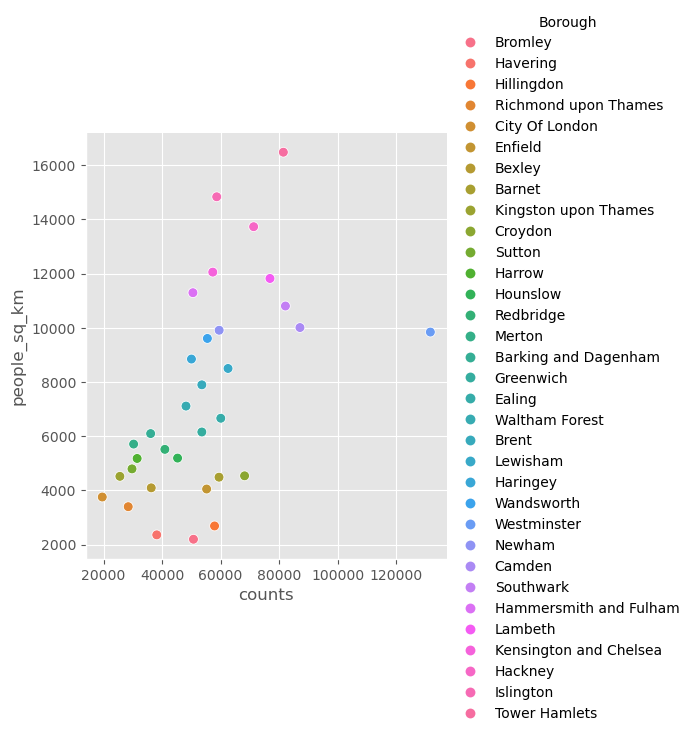

In [38]:
London_pop = pd.read_csv("Population_density_London.csv", sep = ";", engine = 'python')
London_pop.head()
from scipy.stats import pearsonr
pearsonr(x=London_pop['people_sq_km'], y=London_pop['counts'])
plt.figure(figsize=(10,10))
sns.relplot(x=London_pop['counts'], y=London_pop['people_sq_km'], hue = London_pop['Borough'], s= 50)

plt.show(sns)

In [39]:
print(all_incidents['ProperCase'].value_counts())

ProperCase
Westminster               131700
Camden                     87122
Southwark                  82155
Tower Hamlets              81448
Lambeth                    76873
Hackney                    71288
Croydon                    68195
Lewisham                   62539
Ealing                     60057
Newham                     59503
Barnet                     59458
Islington                  58668
Hillingdon                 57930
Kensington And chelsea     57319
Wandsworth                 55479
Enfield                    55220
Greenwich                  53584
Brent                      53583
Bromley                    50722
Hammersmith And fulham     50536
Haringey                   50029
Waltham Forest             48170
Hounslow                   45290
Redbridge                  40945
Havering                   38172
Bexley                     36284
Barking And dagenham       36082
Harrow                     31462
Merton                     30261
Sutton                     29709

SpecialServiceType
Effecting entry/exit               127474
Flooding                           114645
Lift Release                       102789
RTC                                 64406
No action (not false alarm)         47528
Assist other agencies               23477
Making Safe (not RTC)               16793
Spills and Leaks (not RTC)          16056
Animal assistance incidents         11634
Medical Incident                     9967
Hazardous Materials incident         9855
Advice Only                          9328
Removal of objects from people       6828
Other rescue/release of persons      6681
Other Transport incident             5060
Suicide/attempts                     4051
Evacuation (no fire)                 3692
Medical Incident - Co-responder      2197
Stand By                             1266
Rescue or evacuation from water       935
Name: count, dtype: int64


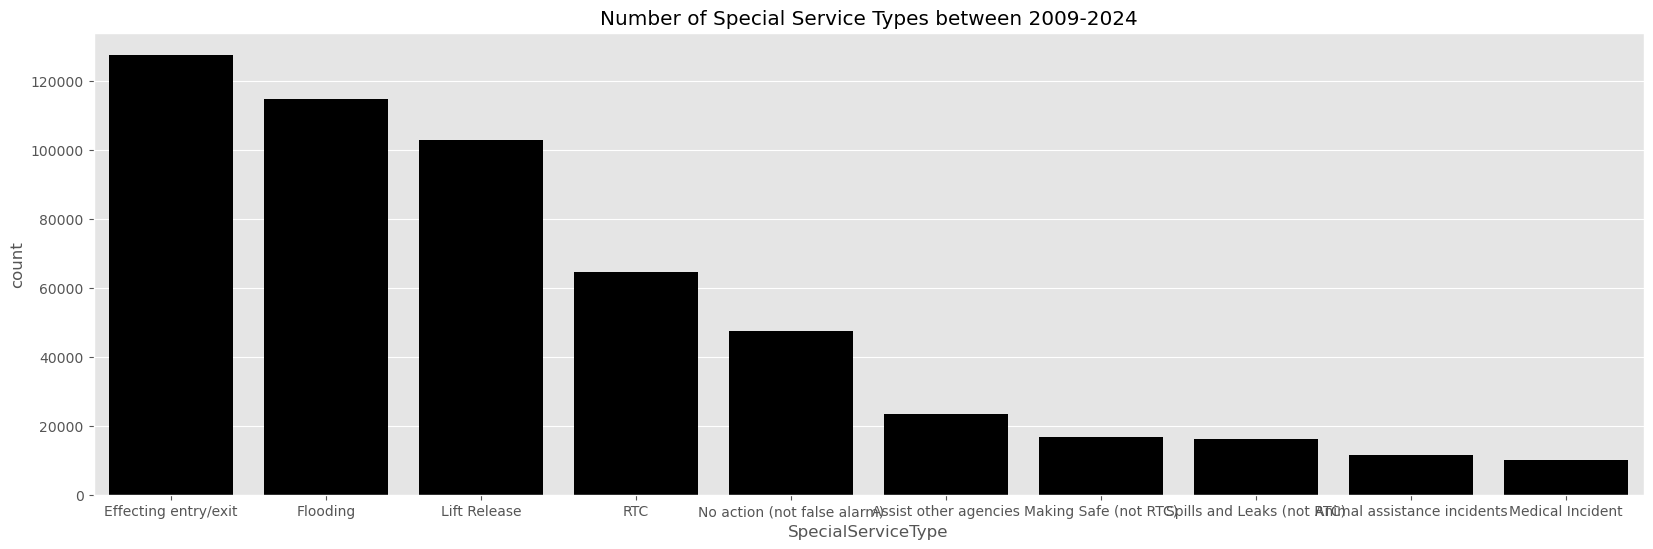

In [44]:
print(all_incidents['SpecialServiceType'].value_counts().head(20))
plt.figure(figsize=(20,6))
sns.barplot(x=all_incidents['SpecialServiceType'].value_counts().head(10).index, y=all_incidents['SpecialServiceType'].value_counts().head(10), color='black')
plt.title("Number of Special Service Types between 2009-2024")
plt.show(sns)

In [46]:
print(all_incidents.isna().sum())
print(all_incidents['SpecialServiceType'].value_counts())
#There are lots of NaNs in Special Service Type ==> should be keep it or ditch it?
#I think it contains important information on type of fire-brigade operation and possible differences in mobilisation times/London boroughs/weekday etc.

IncidentNumber                                  0
DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   6
StopCodeDescription                             0
SpecialServiceType                        1208500
PropertyCategory                                6
PropertyType                                    6
AddressQualifier                                1
Postcode_full                              899135
Postcode_district                               0
UPRN                                       141333
USRN                                       162871
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                               572
IncGeo_WardName                               572


In [48]:
all_incidents_idx=pd.concat([old_incidents, recent_incidents], axis=0, ignore_index=True)

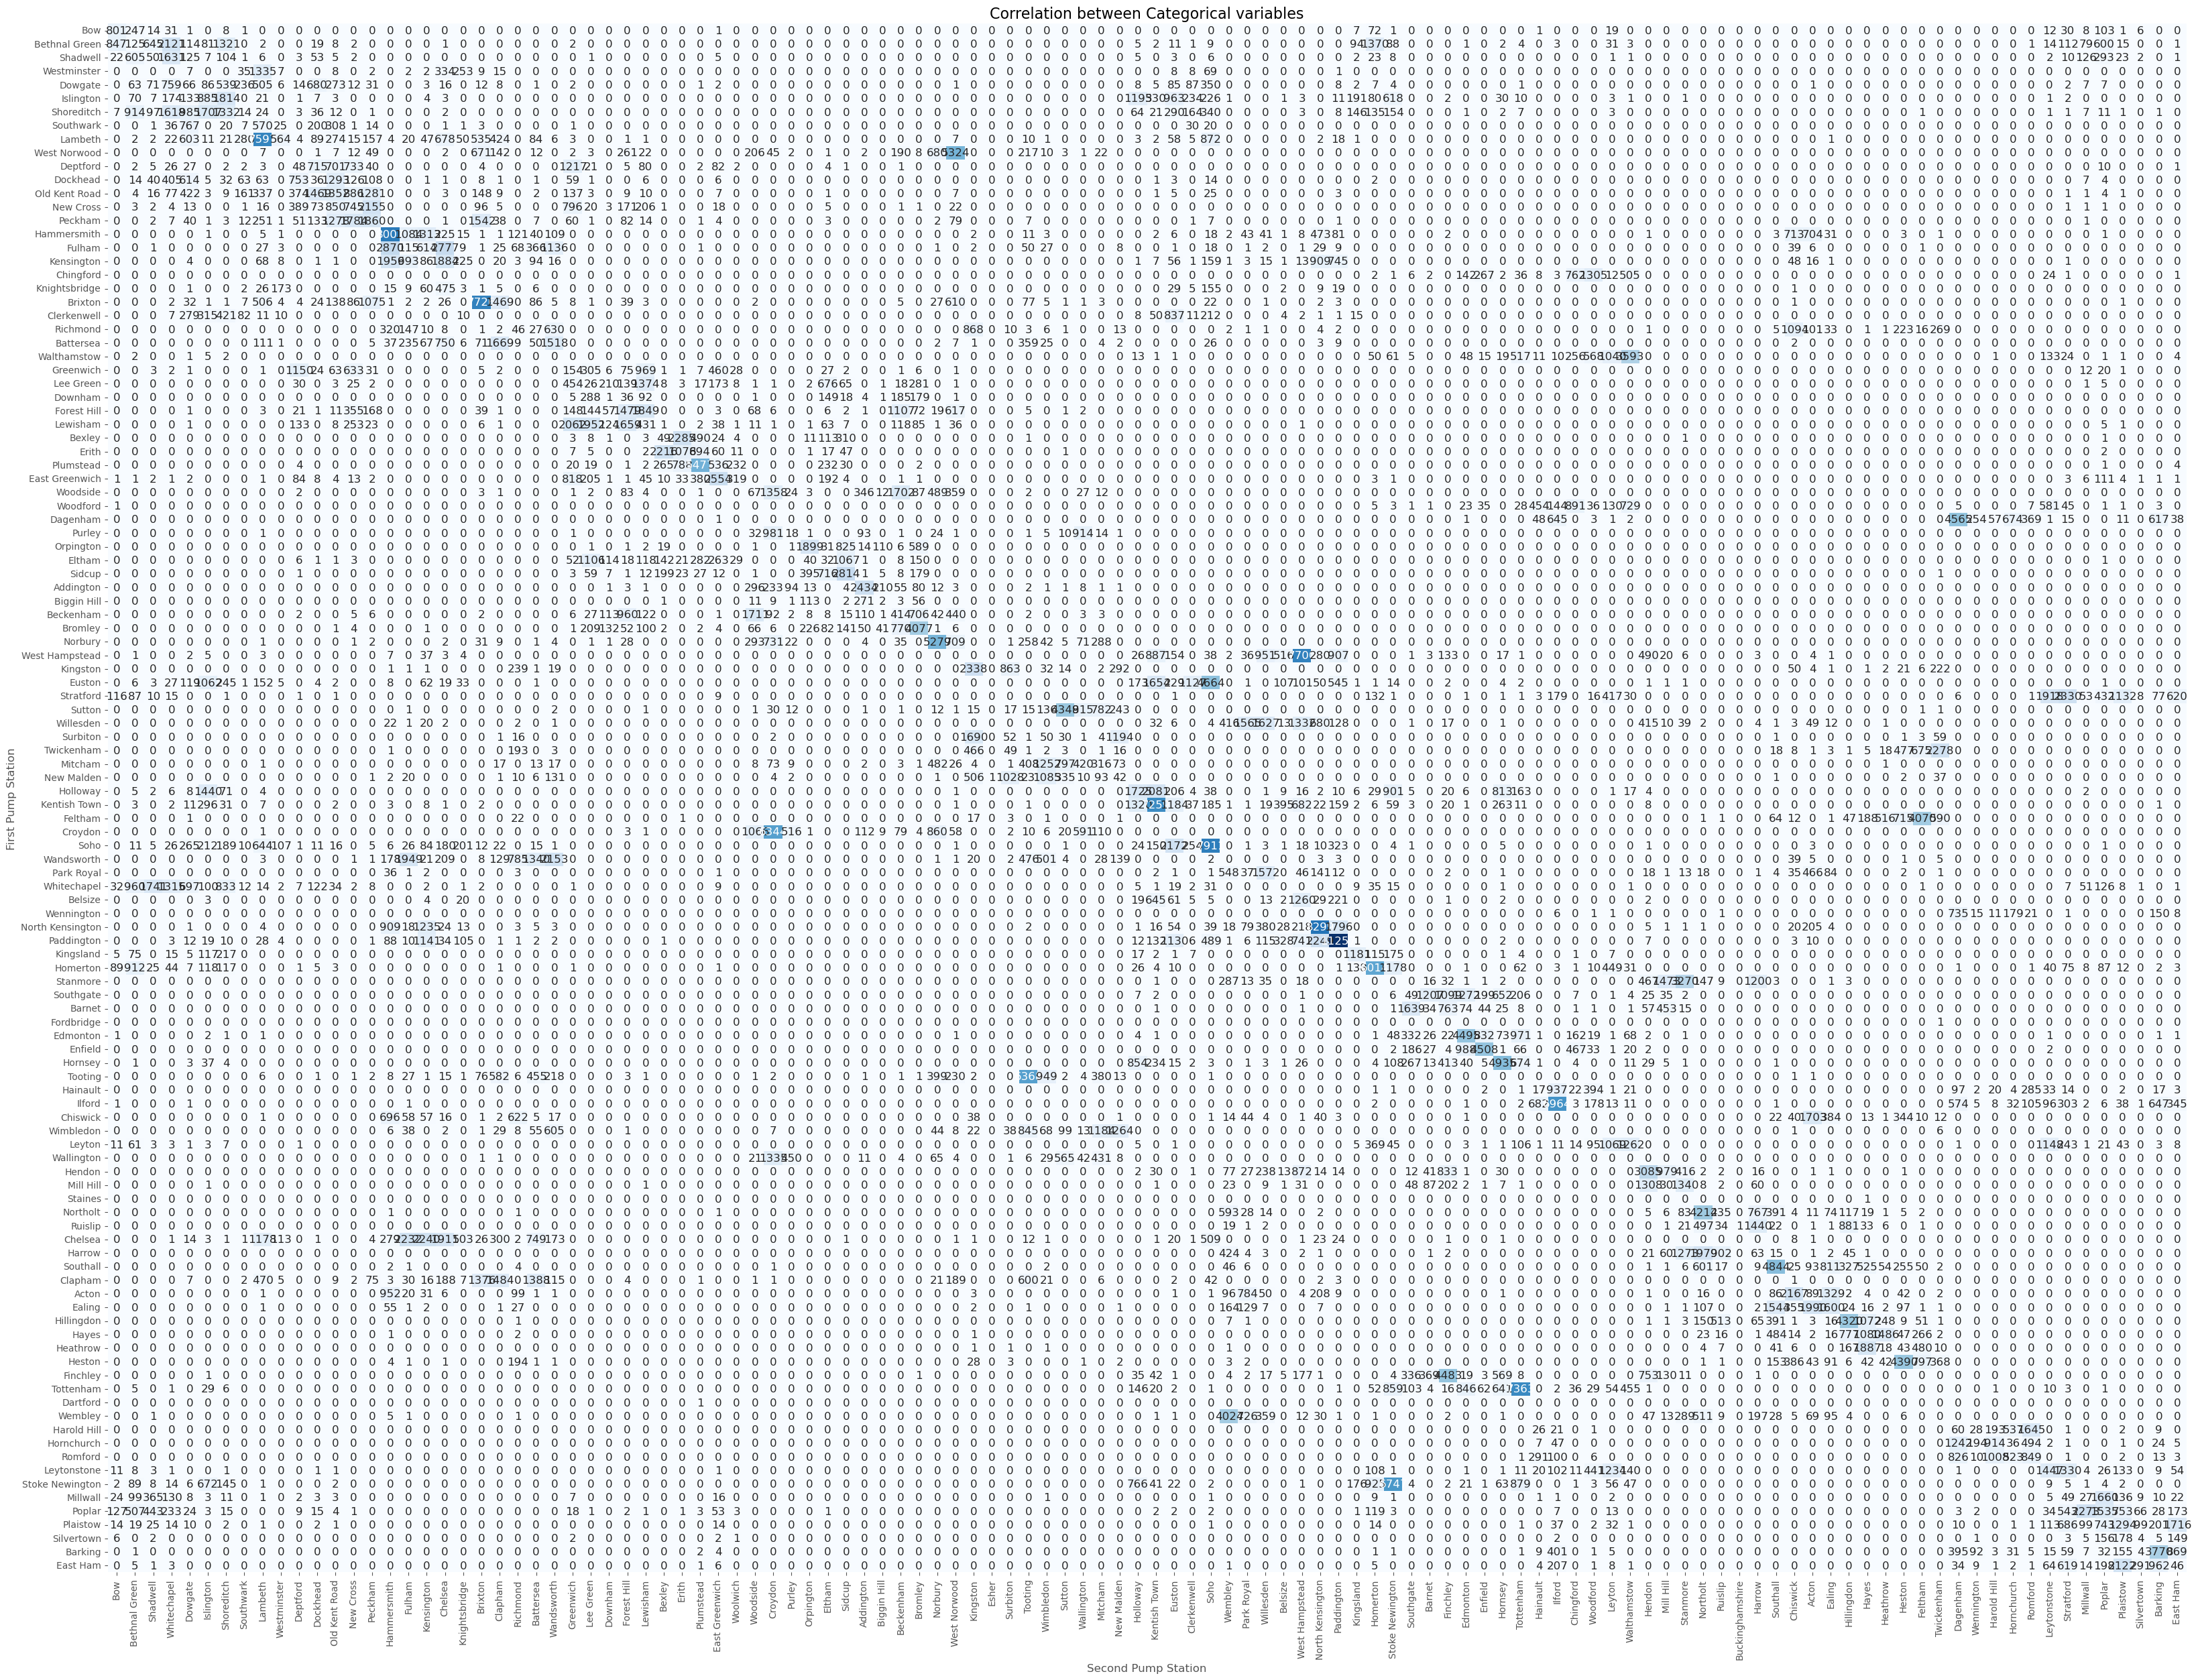

SecondPumpArriving_DeployedFromStation     Acton  Addington   Barking  \
SecondPumpArriving_DeployedFromStation                                  
Acton                                   1.000000  -0.025124 -0.029606   
Addington                              -0.025124   1.000000 -0.020254   
Barking                                -0.029606  -0.020254  1.000000   
Barnet                                 -0.026047  -0.017830 -0.021005   
Battersea                              -0.031650  -0.027787 -0.032860   
...                                          ...        ...       ...   
Willesden                               0.105506  -0.027110 -0.031945   
Wimbledon                              -0.037967  -0.025231 -0.031623   
Woodford                               -0.036763  -0.025150 -0.007337   
Woodside                               -0.033842   0.188497 -0.027283   
Woolwich                               -0.029156  -0.019916 -0.023242   

SecondPumpArriving_DeployedFromStation    Barnet  

In [50]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
contigency_table = pd.crosstab(all_incidents_idx['FirstPumpArriving_DeployedFromStation'], all_incidents_idx['SecondPumpArriving_DeployedFromStation'])
corr_matrix=contigency_table.corr()
linkage_matrix=linkage(corr_matrix, method='ward')
dendro=dendrogram(linkage_matrix, no_plot=True)
sorted_idx=dendro['leaves']
sorted_contigency_table=contigency_table.iloc[sorted_idx, sorted_idx]

plt.figure(figsize=(40,30))
sns.heatmap(sorted_contigency_table, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={"size": 12})
plt.title("Correlation between Categorical variables", fontsize=16)
plt.xlabel("Second Pump Station")
plt.ylabel("First Pump Station")
plt.savefig("Correlation_heatmap.png", format='png', dpi=600)
plt.show(sns)
print(corr_matrix)
print(linkage_matrix)
print(sorted_idx)
plt.show(plt)

In [53]:
def probability(all_incidents):
    same_station_count=0
    total_count=0


    for i in range(len(all_incidents) -1):
        first_station=all_incidents.iloc[i]['FirstPumpArriving_DeployedFromStation']
        second_deployment = all_incidents.iloc[i+1]
        second_station = second_deployment['SecondPumpArriving_DeployedFromStation']
        if first_station == second_station:
            same_station_count +=1
        total_count+= 1

    if total_count > 0:
        probability = same_station_count/total_count
        return probability
    else:
        return 0

prob= probability(all_incidents)
print(f"Probability of second car being deployed from the same station: {prob}")



Probability of second car being deployed from the same station: 0.0010070740539582024


In [55]:
all_incidents['FirstPumpArriving_DeployedFromStation'].nunique()

117

In [57]:
all_incidents.head()

IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall    IncidentGroup  \
0   235138081.00 2009-01-01     2009   00:00:37           0  Special Service   
1        1091.00 2009-01-01     2009   00:00:46           0  Special Service   
2        2091.00 2009-01-01     2009   00:03:00           0             Fire   
3        3091.00 2009-01-01     2009   00:04:27           0             Fire   
4        5091.00 2009-01-01     2009   00:05:39           0             Fire   

  StopCodeDescription     SpecialServiceType PropertyCategory  \
0     Special Service                    RTC     Road Vehicle   
1     Special Service  Assist other agencies          Outdoor   
2      Secondary Fire                    NaN          Outdoor   
3      Secondary Fire                    NaN          Outdoor   
4      Secondary Fire                    NaN          Outdoor   

                                  PropertyType  \
0                                         Car    
1                         Lake/pond/reservoir    
2                       Road surface/pavement    
3  Domestic garden (vegetation not equipment)    
4        Cycle path/public footpath/bridleway    

                               AddressQualifier Postcode_full  \
0         In street close to gazetteer location      SW11 4LB   
1  Open land/water - nearest gazetteer location       SE1 7SG   
2          In street outside gazetteer location        N9 9EL   
3              On land associated with building      UB10 0DG   
4          In street outside gazetteer location        N7 8HG   

  Postcode_district          UPRN        USRN IncGeo_BoroughCode  \
0              SW11           NaN         NaN          E09000032   
1               SE1           NaN         NaN          E09000022   
2                N9           NaN         NaN          E09000010   
3              UB10  1.000215e+11  21401491.0          E09000017   
4                N7           NaN         NaN          E09000019   

  IncGeo_BoroughName  ProperCase IncGeo_WardCode        IncGeo_WardName  \
0         WANDSWORTH  Wandsworth       E05014010         Battersea Park   
1            LAMBETH     Lambeth       E05014118  Waterloo & South Bank   
2            ENFIELD     Enfield       E05013682              Haselbury   
3         HILLINGDON  Hillingdon       E05013571        Hillingdon East   
4          ISLINGTON   Islington       E05013708                Laycock   

      IncGeo_WardNameNew  Easting_m  Northing_m  Easting_rounded  \
0         Battersea Park   528652.0    176830.0           528650   
1  Waterloo & South Bank   530485.0    179007.0           530450   
2              Haselbury   533773.0    194492.0           533750   
3        Hillingdon East   507738.0    182805.0           507750   
4                Laycock   531058.0    185307.0           531050   

   Northing_rounded   Latitude  Longitude     FRS IncidentStationGround  \
0            176850  51.475812  -0.148894  London             Battersea   
1            179050  51.494957  -0.121712  London               Lambeth   
2            194450  51.633342  -0.068488  London              Edmonton   
3            182850  51.533882  -0.448089  London            Hillingdon   
4            185350  51.551441  -0.111120  London              Holloway   

   FirstPumpArriving_AttendanceTime FirstPumpArriving_DeployedFromStation  \
0                             319.0                             Battersea   
1                               NaN                                   NaN   
2                             308.0                              Edmonton   
3                             210.0                            Hillingdon   
4                             233.0                              Holloway   

   SecondPumpArriving_AttendanceTime SecondPumpArriving_DeployedFromStation  \
0                              342.0                                Clapham   
1                                NaN                                    NaN   
2                 

In [59]:
second_station = all_incidents[all_incidents['NumStationsWithPumpsAttending']==2]
second_station.head()

IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall    IncidentGroup  \
0    235138081.00 2009-01-01     2009   00:00:37           0  Special Service   
10       12091.00 2009-01-01     2009   00:16:02           0             Fire   
23       38091.00 2009-01-01     2009   00:33:33           0             Fire   
25       41091.00 2009-01-01     2009   00:35:45           0      False Alarm   
29       44091.00 2009-01-01     2009   00:40:39           0      False Alarm   

          StopCodeDescription SpecialServiceType PropertyCategory  \
0             Special Service                RTC     Road Vehicle   
10               Primary Fire                NaN         Dwelling   
23               Primary Fire                NaN         Dwelling   
25  False alarm - Good intent                NaN         Dwelling   
29  False alarm - Good intent                NaN         Dwelling   

                                         PropertyType  \
0                                                Car    
10                          House - single occupancy    
23  Purpose Built Flats/Maisonettes - Up to 3 stor...   
25                          House - single occupancy    
29  Purpose Built Flats/Maisonettes - 10 or more s...   

                         AddressQualifier Postcode_full Postcode_district  \
0   In street close to gazetteer location      SW11 4LB              SW11   
10              Correct incident location           NaN               N21   
23              Correct incident location           NaN              SE18   
25              Correct incident location           NaN                E6   
29              Correct incident location           NaN               SW8   

    UPRN        USRN IncGeo_BoroughCode IncGeo_BoroughName  ProperCase  \
0    NaN         NaN          E09000032         WANDSWORTH  Wandsworth   
10   0.0  20703023.0          E09000010            ENFIELD     Enfield   
23   0.0  20800937.0          E09000011          GREENWICH   Greenwich   
25   0.0  22200519.0          E09000025             NEWHAM      Newham   
29   0.0  21900650.0          E09000022            LAMBETH     Lambeth   

   IncGeo_WardCode            IncGeo_WardName         IncGeo_WardNameNew  \
0        E05014010             Battersea Park             Battersea Park   
10       E05013681                Grange Park                Grange Park   
23       E05014089              Shooters Hill              Shooters Hill   
25       E05013905                     Boleyn                     Boleyn   
29       E05014111  Stockwell West & Larkhall  Stockwell West & Larkhall   

    Easting_m  Northing_m  Easting_rounded  Northing_rounded   Latitude  \
0    528652.0    176830.0           528650            176850  51.475812   
10        NaN         NaN           531350            195850        NaN   
23        NaN         NaN           543750            177750        NaN   
25        NaN         NaN           541650            183250        NaN   
29        NaN         NaN           530350            176950        NaN   

    Longitude     FRS IncidentStationGround  FirstPumpArriving_AttendanceTime  \
0   -0.148894  London             Battersea                             319.0   
10        NaN  London             Southgate                               NaN   
23        NaN  London             Plumstead                             369.0   
25        NaN  London              East Ham                             190.0   
29        NaN  London               Brixton                             331.0   

   FirstPumpArriving_DeployedFromStation  SecondPumpArriving_AttendanceTime  \
0                              Battersea                              342.0   
10                                   NaN                                NaN   
23                             Plumstead                              402.0   
25                              Plaistow                              251.0   
29                               Clapham                    

In [61]:
second_pump = all_incidents[all_incidents['NumPumpsAttending']==2]
second_pump.head()

IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall    IncidentGroup  \
0    235138081.00 2009-01-01     2009   00:00:37           0  Special Service   
4         5091.00 2009-01-01     2009   00:05:39           0             Fire   
5         6091.00 2009-01-01     2009   00:06:03           0      False Alarm   
7         9091.00 2009-01-01     2009   00:13:42           0             Fire   
10       12091.00 2009-01-01     2009   00:16:02           0             Fire   

   StopCodeDescription SpecialServiceType   PropertyCategory  \
0      Special Service                RTC       Road Vehicle   
4       Secondary Fire                NaN            Outdoor   
5                  AFA                NaN           Dwelling   
7       Secondary Fire                NaN  Outdoor Structure   
10        Primary Fire                NaN           Dwelling   

                                         PropertyType  \
0                                                Car    
4               Cycle path/public footpath/bridleway    
5   Purpose Built Flats/Maisonettes - Up to 3 stor...   
7                                 Refuse/rubbish tip    
10                          House - single occupancy    

                         AddressQualifier Postcode_full Postcode_district  \
0   In street close to gazetteer location      SW11 4LB              SW11   
4    In street outside gazetteer location        N7 8HG                N7   
5               Correct incident location           NaN               NW5   
7        On land associated with building       TW3 2RE               TW3   
10              Correct incident location           NaN               N21   

            UPRN        USRN IncGeo_BoroughCode IncGeo_BoroughName  \
0            NaN         NaN          E09000032         WANDSWORTH   
4            NaN         NaN          E09000019          ISLINGTON   
5   0.000000e+00  20499122.0          E09000007             CAMDEN   
7   1.000216e+11  21500957.0          E09000018           HOUNSLOW   
10  0.000000e+00  20703023.0          E09000010            ENFIELD   

    ProperCase IncGeo_WardCode     IncGeo_WardName  IncGeo_WardNameNew  \
0   Wandsworth       E05014010      Battersea Park      Battersea Park   
4    Islington       E05013708             Laycock             Laycock   
5       Camden       E05013663  Kentish Town North  Kentish Town North   
7     Hounslow       E05013623      Hounslow South      Hounslow South   
10     Enfield       E05013681         Grange Park         Grange Park   

    Easting_m  Northing_m  Easting_rounded  Northing_rounded   Latitude  \
0    528652.0    176830.0           528650            176850  51.475812   
4    531058.0    185307.0           531050            185350  51.551441   
5         NaN         NaN           529450            185250        NaN   
7    514529.0    174907.0           514550            174950  51.461560   
10        NaN         NaN           531350            195850        NaN   

    Longitude     FRS IncidentStationGround  FirstPumpArriving_AttendanceTime  \
0   -0.148894  London             Battersea                             319.0   
4   -0.111120  London              Holloway                             233.0   
5         NaN  London          Kentish Town                             172.0   
7   -0.352783  London                Heston                             342.0   
10        NaN  London             Southgate                               NaN   

   FirstPumpArriving_DeployedFromStation  SecondPumpArriving_AttendanceTime  \
0                              Battersea                              342.0   
4                               Holloway                              250.0   
5                           Kentish Town                              222.0   
7                                 Heston                              349.0   
10                                   NaN                                NaN   

   SecondPumpArriving_DeployedFromStation  Num

In [63]:
all_incidents['same_station']=all_incidents['FirstPumpArriving_DeployedFromStation'] == all_incidents['SecondPumpArriving_DeployedFromStation']
same_station_count = all_incidents['same_station'].sum()
total_calls = all_incidents.shape[0]
probability=same_station_count/total_calls
print(f"Probability that the second car was deployed from the same station as the first: {probability}")

Probability that the second car was deployed from the same station as the first: 0.1356164421755241


In [65]:
all_incidents['diff_station']=all_incidents['FirstPumpArriving_DeployedFromStation'] != all_incidents['SecondPumpArriving_DeployedFromStation']
diff_station_count = all_incidents['diff_station'].sum()
total_calls = all_incidents.shape[0]
probability=diff_station_count/total_calls
print(f"Probability that the second car was deployed from a different station as the first: {probability}")

Probability that the second car was deployed from a different station as the first: 0.8643835578244758


In [67]:
second_pump['same_station']=second_pump['FirstPumpArriving_DeployedFromStation'] == second_pump['SecondPumpArriving_DeployedFromStation']
same_station_count = second_pump['same_station'].sum()
total_calls = second_pump.shape[0]
probability=same_station_count/total_calls
print(f"Probability that the second car was deployed from the same station as the first: {probability}")

Probability that the second car was deployed from the same station as the first: 0.33884248520901417


C:\Users\Thesa\AppData\Local\Temp\ipykernel_13440\2032622662.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
second_station['same_station']=second_station['FirstPumpArriving_DeployedFromStation'] == second_station['SecondPumpArriving_DeployedFromStation']
same_station_count = second_station['same_station'].sum()
total_calls = second_station.shape[0]
probability=same_station_count/total_calls
print(f"Probability that the second car was deployed from the same station as the first: {probability}")

Probability that the second car was deployed from the same station as the first: 0.11141110509574119


C:\Users\Thesa\AppData\Local\Temp\ipykernel_13440\1461343669.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
second_pump_nona=second_pump.dropna()
second_pump_nona['same_station']=second_pump_nona['FirstPumpArriving_DeployedFromStation'] == second_pump_nona['SecondPumpArriving_DeployedFromStation']
same_station_count = second_pump_nona['same_station'].sum()
total_calls = second_pump_nona.shape[0]
probability=same_station_count/total_calls
print(f"Probability that the second car was deployed from the same station as the first: {probability}")

Probability that the second car was deployed from the same station as the first: 0.37441619097042034


C:\Users\Thesa\AppData\Local\Temp\ipykernel_13440\2390664885.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
all_incidents_nonans= all_incidents.dropna()
all_incidents_nonans['same_station']=all_incidents_nonans['FirstPumpArriving_DeployedFromStation'] == all_incidents_nonans['SecondPumpArriving_DeployedFromStation']
same_station_count = all_incidents_nonans['same_station'].sum()
total_calls = all_incidents_nonans.shape[0]
probability=same_station_count/total_calls
print(f"Probability that the second car was deployed from the same station as the first: {probability}")

Probability that the second car was deployed from the same station as the first: 0.36347384604383426


C:\Users\Thesa\AppData\Local\Temp\ipykernel_13440\4289356967.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
all_incidents_nonans['diff_station']=all_incidents_nonans['FirstPumpArriving_DeployedFromStation'] != all_incidents_nonans['SecondPumpArriving_DeployedFromStation']
diff_station_count = all_incidents_nonans['diff_station'].sum()
total_calls = all_incidents_nonans.shape[0]
probability=diff_station_count/total_calls
print(f"Probability that the second car was deployed from the same station as the first: {probability}")

Probability that the second car was deployed from the same station as the first: 0.6365261539561657


C:\Users\Thesa\AppData\Local\Temp\ipykernel_13440\4118465558.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
all_incidents_nonans= all_incidents.dropna()
def probability(all_incidents_nonans):
    same_station_count=0
    total_count=0


    for i in range(len(all_incidents_nonans) -1):
        first_station=all_incidents.iloc[i]['FirstPumpArriving_DeployedFromStation']
        second_deployment = all_incidents.iloc[i+1]
        second_station = second_deployment['SecondPumpArriving_DeployedFromStation']
        if first_station == second_station:
            same_station_count +=1
        total_count+= 1

    if total_count > 0:
        probability = same_station_count/total_count
        return probability
    else:
        return 0

prob= probability(all_incidents_nonans)
print(f"Probability of second car being deployed from the same station: {prob}")



Probability of second car being deployed from the same station: 0.0011084096109839816


In [83]:
print(all_incidents_idx['Latitude'].isna().sum())
print(all_incidents_idx['Longitude'].isna().sum())
print(all_incidents_idx['Postcode_full'].isna().sum())
print(all_incidents_idx['UPRN'].isna().sum())
print(all_incidents_idx['USRN'].isna().sum())

899135
899135
899135
141333
162871


In [85]:
print(all_incidents_idx['Latitude'].isna().sum())
print(all_incidents_idx['Longitude'].isna().sum())

899135
899135


In [87]:
all_incidents_idx.describe()

CalYear    HourOfCall          UPRN          USRN      Easting_m  \
count  1.793315e+06  1.793315e+06  1.651982e+06  1.630444e+06  894180.000000   
mean   2.016548e+03  1.346681e+01  2.183224e+10  2.031646e+07  530632.157642   
std    4.819181e+00  6.254862e+00  4.744677e+10  4.377518e+06   10337.775068   
min    2.009000e+03  0.000000e+00  0.000000e+00  0.000000e+00  503582.000000   
25%    2.012000e+03  9.000000e+00  0.000000e+00  2.040096e+07  525183.000000   
50%    2.017000e+03  1.400000e+01  0.000000e+00  2.120128e+07  530796.000000   
75%    2.021000e+03  1.900000e+01  1.001315e+10  2.210114e+07  536834.000000   
max    2.024000e+03  2.300000e+01  2.000044e+11  9.999042e+07  561126.000000   

          Northing_m  Easting_rounded  Northing_rounded       Latitude  \
count  894180.000000     1.793315e+06      1.793315e+06  894180.000000   
mean   180365.720450     5.306580e+05      1.804867e+05      51.444898   
std      7434.978204     9.725041e+03      7.358044e+03       1.789388   
min    155901.000000     5.035500e+05      1.559500e+05       0.000000   
25%    175991.000000     5.252500e+05      1.761500e+05      51.468961   
50%    180982.000000     5.309500e+05      1.810500e+05      51.512881   
75%    184943.000000     5.362500e+05      1.851500e+05      51.547780   
max    200906.000000     6.111500e+05      3.024500e+05      51.691670   

           Longitude  FirstPumpArriving_AttendanceTime  \
count  894180.000000                      1.656519e+06   
mean       -0.118839                      3.183722e+02   
std         0.149006                      1.386455e+02   
min        -0.510155                      1.000000e+00   
25%        -0.197464                      2.310000e+02   
50%        -0.116993                      2.970000e+02   
75%        -0.028672                      3.780000e+02   
max         0.322219                      1.200000e+03   

       SecondPumpArriving_AttendanceTime  NumStationsWithPumpsAttending  \
count                      641917.000000                   1.779008e+06   
mean                          395.606510                   1.370065e+00   
std                           153.294613                   6.854201e-01   
min                             1.000000                   1.000000e+00   
25%                           295.000000                   1.000000e+00   
50%                           369.000000                   1.000000e+00   
75%                           464.000000                   2.000000e+00   
max                          1200.000000                   4.600000e+01   

       NumPumpsAttending     PumpCount  PumpMinutesRounded  Notional Cost (£)  \
count       1.779008e+06  1.793315e+06        1.793315e+06       1.793315e+06   
mean        1.554517e+00  1.591982e+00        7.625252e+01       4.054220e+02   
std         8.430744e-01  1.582282e+00        5.646239e+02       2.696265e+03   
min         1.000000e+00  1.000000e+00        6.000000e+01       2.550000e+02   
25%         1.000000e+00  1.000000e+00        6.000000e+01       2.690000e+02   
50%         1.000000e+00  1.000000e+00        6.000000e+01       3.280000e+02   
75%         2.000000e+00  2.000000e+00        6.000000e+01       3.640000e+02   
max         1.060000e+02  9.510000e+02        5.256290e+05       2.277726e+06   

           NumCalls  
count  1.791466e+06  
mean   1.328686e+00  
std    1.484632e+00  
min    1.000000e+00  
25%    1.000000e+00  
50%    1.000000e+00  
75%    1.000000e+00  
max    3.690000e+02

In [89]:
all_incidents.head()

IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall    IncidentGroup  \
0   235138081.00 2009-01-01     2009   00:00:37           0  Special Service   
1        1091.00 2009-01-01     2009   00:00:46           0  Special Service   
2        2091.00 2009-01-01     2009   00:03:00           0             Fire   
3        3091.00 2009-01-01     2009   00:04:27           0             Fire   
4        5091.00 2009-01-01     2009   00:05:39           0             Fire   

  StopCodeDescription     SpecialServiceType PropertyCategory  \
0     Special Service                    RTC     Road Vehicle   
1     Special Service  Assist other agencies          Outdoor   
2      Secondary Fire                    NaN          Outdoor   
3      Secondary Fire                    NaN          Outdoor   
4      Secondary Fire                    NaN          Outdoor   

                                  PropertyType  \
0                                         Car    
1                         Lake/pond/reservoir    
2                       Road surface/pavement    
3  Domestic garden (vegetation not equipment)    
4        Cycle path/public footpath/bridleway    

                               AddressQualifier Postcode_full  \
0         In street close to gazetteer location      SW11 4LB   
1  Open land/water - nearest gazetteer location       SE1 7SG   
2          In street outside gazetteer location        N9 9EL   
3              On land associated with building      UB10 0DG   
4          In street outside gazetteer location        N7 8HG   

  Postcode_district          UPRN        USRN IncGeo_BoroughCode  \
0              SW11           NaN         NaN          E09000032   
1               SE1           NaN         NaN          E09000022   
2                N9           NaN         NaN          E09000010   
3              UB10  1.000215e+11  21401491.0          E09000017   
4                N7           NaN         NaN          E09000019   

  IncGeo_BoroughName  ProperCase IncGeo_WardCode        IncGeo_WardName  \
0         WANDSWORTH  Wandsworth       E05014010         Battersea Park   
1            LAMBETH     Lambeth       E05014118  Waterloo & South Bank   
2            ENFIELD     Enfield       E05013682              Haselbury   
3         HILLINGDON  Hillingdon       E05013571        Hillingdon East   
4          ISLINGTON   Islington       E05013708                Laycock   

      IncGeo_WardNameNew  Easting_m  Northing_m  Easting_rounded  \
0         Battersea Park   528652.0    176830.0           528650   
1  Waterloo & South Bank   530485.0    179007.0           530450   
2              Haselbury   533773.0    194492.0           533750   
3        Hillingdon East   507738.0    182805.0           507750   
4                Laycock   531058.0    185307.0           531050   

   Northing_rounded   Latitude  Longitude     FRS IncidentStationGround  \
0            176850  51.475812  -0.148894  London             Battersea   
1            179050  51.494957  -0.121712  London               Lambeth   
2            194450  51.633342  -0.068488  London              Edmonton   
3            182850  51.533882  -0.448089  London            Hillingdon   
4            185350  51.551441  -0.111120  London              Holloway   

   FirstPumpArriving_AttendanceTime FirstPumpArriving_DeployedFromStation  \
0                             319.0                             Battersea   
1                               NaN                                   NaN   
2                             308.0                              Edmonton   
3                             210.0                            Hillingdon   
4                             233.0                              Holloway   

   SecondPumpArriving_AttendanceTime SecondPumpArriving_DeployedFromStation  \
0                              342.0                                Clapham   
1                                NaN                                    NaN   
2                 

In [91]:
print(all_incidents['IncidentStationGround'].unique())

['Battersea' 'Lambeth' 'Edmonton' 'Hillingdon' 'Holloway' 'Kentish Town'
 'Lee Green' 'Heston' 'Shoreditch' 'Soho' 'Southgate' 'Peckham' 'Homerton'
 'Enfield' 'Dowgate' 'Beckenham' 'Mitcham' 'North Kensington' 'Wallington'
 'Plumstead' 'Euston' 'East Ham' 'Old Kent Road' 'Brixton' 'Tooting'
 'Hainault' 'Poplar' 'West Norwood' 'Walthamstow' 'Greenwich' 'Croydon'
 'West Hampstead' 'Norbury' 'Twickenham' 'Finchley' 'Paddington'
 'Deptford' 'Hornsey' 'Bexley' 'New Malden' 'Willesden' 'Eltham'
 'Dagenham' 'Stratford' 'Bethnal Green' 'Barnet' 'Addington' 'Ilford'
 'East Greenwich' 'Islington' 'Leyton' 'Hayes' 'Wembley' 'Stoke Newington'
 'Richmond' 'Woodside' 'Tottenham' 'Hammersmith' 'Barking' 'Orpington'
 'Erith' 'Plaistow' 'New Cross' 'Harold Hill' 'Ruislip' 'Ealing'
 'Mill Hill' 'Heathrow' 'Woodford' 'Surbiton' 'Wandsworth' 'Northolt'
 'Purley' 'Clapham' 'Leytonstone' 'Kensington' 'Stanmore' 'Southall'
 'Dockhead' 'Feltham' 'Bromley' 'Romford' 'Kingston' 'Wimbledon'
 'Forest Hill' 'White

In [93]:
print(all_incidents['FirstPumpArriving_DeployedFromStation'].unique())

['Battersea' nan 'Edmonton' 'Hillingdon' 'Holloway' 'Kentish Town'
 'East Greenwich' 'Heston' 'Clerkenwell' 'Euston' 'Peckham' 'Feltham'
 'Homerton' 'Enfield' 'Dowgate' 'Beckenham' 'Mitcham' 'North Kensington'
 'Soho' 'Plumstead' 'Plaistow' 'Old Kent Road' 'Southwark' 'Clapham'
 'Tooting' 'Hainault' 'Poplar' 'West Norwood' 'Leyton' 'Greenwich'
 'Islington' 'Croydon' 'Norbury' 'Kingston' 'Barnet' 'Paddington'
 'Deptford' 'Hornsey' 'Bexley' 'New Malden' 'West Hampstead' 'Eltham'
 'Sidcup' 'Brixton' 'Dagenham' 'Stratford' 'Bethnal Green' 'Addington'
 'Hendon' 'Ilford' 'Hayes' 'Stanmore' 'Stoke Newington' 'Wandsworth'
 'Twickenham' 'Tottenham' 'Hammersmith' 'Barking' 'East Ham' 'Belsize'
 'Erith' 'New Cross' 'Romford' 'Ruislip' 'Shoreditch' 'Ealing' 'Mill Hill'
 'Heathrow' 'Woodford' 'Walthamstow' 'Surbiton' 'Northolt' 'Southall'
 'Dockhead' 'Bromley' 'Orpington' 'Park Royal' 'Lambeth' 'Hornchurch'
 'Wimbledon' 'Woolwich' 'Forest Hill' 'Willesden' 'Whitechapel' 'Sutton'
 'Woodside' 'Harrow

In [95]:
print(all_incidents['IncGeo_WardName'].unique())

['Battersea Park' 'Waterloo & South Bank' 'Haselbury' ...
 'WORCESTER PARK SOUTH' 'COOMBE VALE' 'HOUNSLOW SOUTH']


In [97]:
print("IncidentStationGround", all_incidents['IncidentStationGround'].nunique())
print("PorperCase", all_incidents['ProperCase'].nunique())
print("IncGeo_BoroughCode", all_incidents['IncGeo_BoroughCode'].nunique())
print("IncGeo_BoroughName", all_incidents['IncGeo_BoroughName'].nunique())
print("IncGeo_WardCode", all_incidents['IncGeo_WardCode'].nunique())
print("IncGeo_WardName", all_incidents['IncGeo_WardName'].nunique())
print("IncGeo_WardNameNew", all_incidents['IncGeo_WardNameNew'].nunique())
print("Easting_rounded", all_incidents['Easting_rounded'].nunique())
print("Northing_rounded", all_incidents['Northing_rounded'].nunique())
print("Postcode_district", all_incidents['Postcode_district'].nunique())
print("FirstPump_Arriving_DeployedFromStation", all_incidents['FirstPumpArriving_DeployedFromStation'].nunique())

IncidentStationGround 103
PorperCase 33
IncGeo_BoroughCode 33
IncGeo_BoroughName 33
IncGeo_WardCode 899
IncGeo_WardName 1484
IncGeo_WardNameNew 1481
Easting_rounded 574
Northing_rounded 448
Postcode_district 330
FirstPump_Arriving_DeployedFromStation 117


In [99]:
all_incidents_idx['Latitude'].replace(0, 51.444898, inplace=True)
all_incidents_idx.describe()

C:\Users\Thesa\AppData\Local\Temp\ipykernel_13440\2149763466.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





CalYear    HourOfCall          UPRN          USRN      Easting_m  \
count  1.793315e+06  1.793315e+06  1.651982e+06  1.630444e+06  894180.000000   
mean   2.016548e+03  1.346681e+01  2.183224e+10  2.031646e+07  530632.157642   
std    4.819181e+00  6.254862e+00  4.744677e+10  4.377518e+06   10337.775068   
min    2.009000e+03  0.000000e+00  0.000000e+00  0.000000e+00  503582.000000   
25%    2.012000e+03  9.000000e+00  0.000000e+00  2.040096e+07  525183.000000   
50%    2.017000e+03  1.400000e+01  0.000000e+00  2.120128e+07  530796.000000   
75%    2.021000e+03  1.900000e+01  1.001315e+10  2.210114e+07  536834.000000   
max    2.024000e+03  2.300000e+01  2.000044e+11  9.999042e+07  561126.000000   

          Northing_m  Easting_rounded  Northing_rounded       Latitude  \
count  894180.000000     1.793315e+06      1.793315e+06  894180.000000   
mean   180365.720450     5.306580e+05      1.804867e+05      51.506976   
std      7434.978204     9.725041e+03      7.358044e+03       0.066682   
min    155901.000000     5.035500e+05      1.559500e+05      51.287216   
25%    175991.000000     5.252500e+05      1.761500e+05      51.468961   
50%    180982.000000     5.309500e+05      1.810500e+05      51.512881   
75%    184943.000000     5.362500e+05      1.851500e+05      51.547780   
max    200906.000000     6.111500e+05      3.024500e+05      51.691670   

           Longitude  FirstPumpArriving_AttendanceTime  \
count  894180.000000                      1.656519e+06   
mean       -0.118839                      3.183722e+02   
std         0.149006                      1.386455e+02   
min        -0.510155                      1.000000e+00   
25%        -0.197464                      2.310000e+02   
50%        -0.116993                      2.970000e+02   
75%        -0.028672                      3.780000e+02   
max         0.322219                      1.200000e+03   

       SecondPumpArriving_AttendanceTime  NumStationsWithPumpsAttending  \
count                      641917.000000                   1.779008e+06   
mean                          395.606510                   1.370065e+00   
std                           153.294613                   6.854201e-01   
min                             1.000000                   1.000000e+00   
25%                           295.000000                   1.000000e+00   
50%                           369.000000                   1.000000e+00   
75%                           464.000000                   2.000000e+00   
max                          1200.000000                   4.600000e+01   

       NumPumpsAttending     PumpCount  PumpMinutesRounded  Notional Cost (£)  \
count       1.779008e+06  1.793315e+06        1.793315e+06       1.793315e+06   
mean        1.554517e+00  1.591982e+00        7.625252e+01       4.054220e+02   
std         8.430744e-01  1.582282e+00        5.646239e+02       2.696265e+03   
min         1.000000e+00  1.000000e+00        6.000000e+01       2.550000e+02   
25%         1.000000e+00  1.000000e+00        6.000000e+01       2.690000e+02   
50%         1.000000e+00  1.000000e+00        6.000000e+01       3.280000e+02   
75%         2.000000e+00  2.000000e+00        6.000000e+01       3.640000e+02   
max         1.060000e+02  9.510000e+02        5.256290e+05       2.277726e+06   

           NumCalls  
count  1.791466e+06  
mean   1.328686e+00  
std    1.484632e+00  
min    1.000000e+00  
25%    1.000000e+00  
50%    1.000000e+00  
75%    1.000000e+00  
max    3.690000e+02

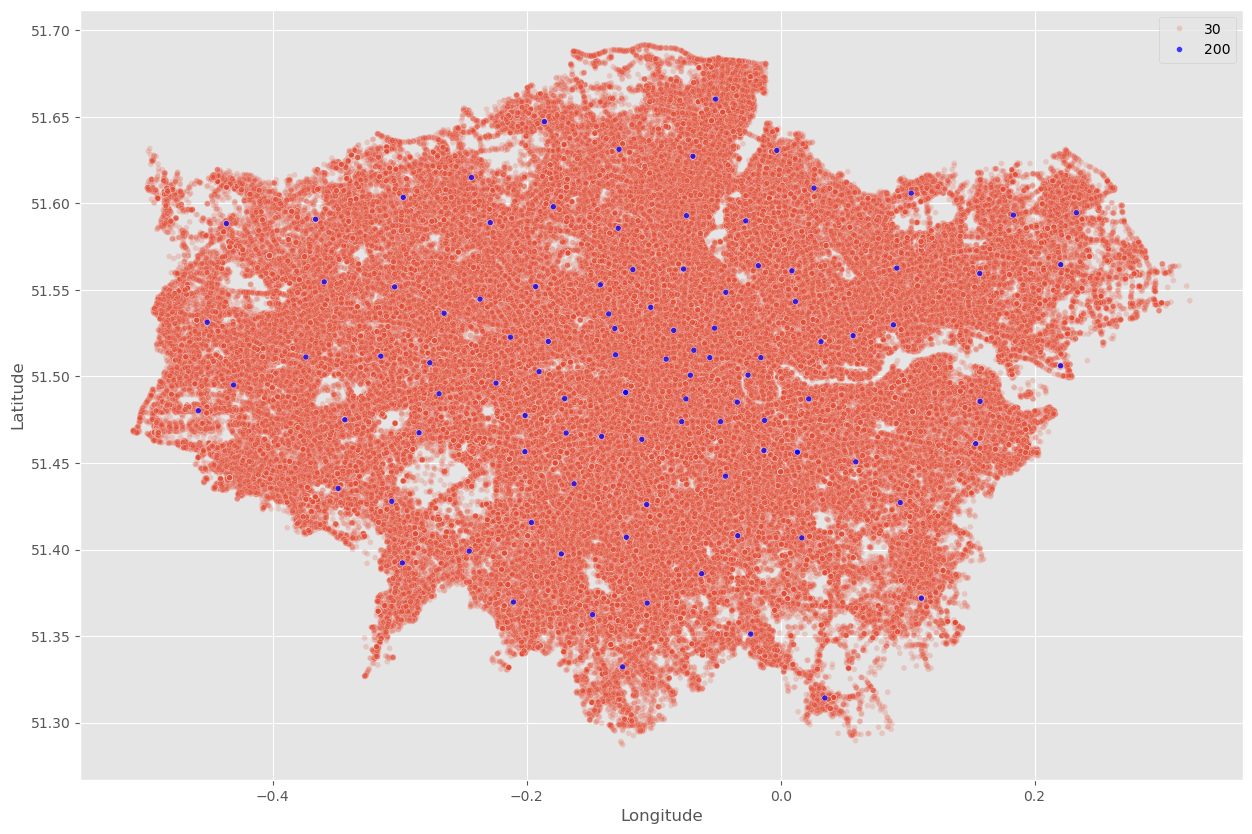

In [103]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=all_incidents_idx, x='Longitude', y='Latitude', size=30, alpha = 0.2)
sns.scatterplot(data=LFB_addresses, x='Longitude', y='Latitude', size=200, alpha=0.75, color='blue')
plt.show(sns)

In [105]:
all_incidents_Clerkenwell = all_incidents[all_incidents['IncidentStationGround']=='Clerkenwell']
all_incidents_Clerkenwell.info()
all_incidents_Clerkenwell_idx=all_incidents_Clerkenwell.reset_index()
all_incidents_Clerkenwell_idx.head()
print(all_incidents_Clerkenwell_idx['Postcode_district'].nunique())
print(all_incidents_Clerkenwell_idx['Postcode_district'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   IncidentNumber                          0 non-null      object        
 1   DateOfCall                              0 non-null      datetime64[ns]
 2   CalYear                                 0 non-null      int64         
 3   TimeOfCall                              0 non-null      object        
 4   HourOfCall                              0 non-null      int64         
 5   IncidentGroup                           0 non-null      object        
 6   StopCodeDescription                     0 non-null      object        
 7   SpecialServiceType                      0 non-null      object        
 8   PropertyCategory                        0 non-null      object        
 9   PropertyType                            0 non-null      object        


In [107]:
all_incidents_Silvertown = all_incidents[all_incidents['IncidentStationGround']=='Silvertown']
all_incidents_Silvertown.info()
all_incidents_Silvertown_idx=all_incidents_Silvertown.reset_index()
all_incidents_Silvertown_idx.head()
print(all_incidents_Silvertown_idx['Postcode_district'].nunique())
print(all_incidents_Silvertown_idx['Postcode_district'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   IncidentNumber                          0 non-null      object        
 1   DateOfCall                              0 non-null      datetime64[ns]
 2   CalYear                                 0 non-null      int64         
 3   TimeOfCall                              0 non-null      object        
 4   HourOfCall                              0 non-null      int64         
 5   IncidentGroup                           0 non-null      object        
 6   StopCodeDescription                     0 non-null      object        
 7   SpecialServiceType                      0 non-null      object        
 8   PropertyCategory                        0 non-null      object        
 9   PropertyType                            0 non-null      object        


In [109]:
all_incidents_Kingsland = all_incidents[all_incidents['IncidentStationGround']=='Kingsland']
all_incidents_Kingsland.info()
all_incidents_Kingsland_idx=all_incidents_Kingsland.reset_index()
all_incidents_Kingsland_idx.head()
print(all_incidents_Kingsland_idx['Postcode_district'].nunique())
print(all_incidents_Kingsland_idx['Postcode_district'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   IncidentNumber                          0 non-null      object        
 1   DateOfCall                              0 non-null      datetime64[ns]
 2   CalYear                                 0 non-null      int64         
 3   TimeOfCall                              0 non-null      object        
 4   HourOfCall                              0 non-null      int64         
 5   IncidentGroup                           0 non-null      object        
 6   StopCodeDescription                     0 non-null      object        
 7   SpecialServiceType                      0 non-null      object        
 8   PropertyCategory                        0 non-null      object        
 9   PropertyType                            0 non-null      object        


In [111]:
all_incidents_Bow = all_incidents[all_incidents['IncidentStationGround']=='Bow']
all_incidents_Bow.info()
all_incidents_Bow_idx=all_incidents_Bow.reset_index()
all_incidents_Bow_idx.head()
print(all_incidents_Bow_idx['Postcode_district'].nunique())
print(all_incidents_Bow_idx['Postcode_district'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   IncidentNumber                          0 non-null      object        
 1   DateOfCall                              0 non-null      datetime64[ns]
 2   CalYear                                 0 non-null      int64         
 3   TimeOfCall                              0 non-null      object        
 4   HourOfCall                              0 non-null      int64         
 5   IncidentGroup                           0 non-null      object        
 6   StopCodeDescription                     0 non-null      object        
 7   SpecialServiceType                      0 non-null      object        
 8   PropertyCategory                        0 non-null      object        
 9   PropertyType                            0 non-null      object        


In [113]:
all_incidents_Downham = all_incidents[all_incidents['IncidentStationGround']=='Downham']
all_incidents_Downham.info()
all_incidents_Downham_idx=all_incidents_Downham.reset_index()
all_incidents_Downham_idx.head()
print(all_incidents_Downham_idx['Postcode_district'].nunique())
print(all_incidents_Downham_idx['Postcode_district'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   IncidentNumber                          0 non-null      object        
 1   DateOfCall                              0 non-null      datetime64[ns]
 2   CalYear                                 0 non-null      int64         
 3   TimeOfCall                              0 non-null      object        
 4   HourOfCall                              0 non-null      int64         
 5   IncidentGroup                           0 non-null      object        
 6   StopCodeDescription                     0 non-null      object        
 7   SpecialServiceType                      0 non-null      object        
 8   PropertyCategory                        0 non-null      object        
 9   PropertyType                            0 non-null      object        


In [115]:
all_incidents_Buckinghamshire = all_incidents[all_incidents['IncidentStationGround']=='Buckinghamshire']
all_incidents_Buckinghamshire.info()
all_incidents_Buckinghamshire_idx=all_incidents_Buckinghamshire.reset_index()
all_incidents_Buckinghamshire_idx.head()
print(all_incidents_Buckinghamshire_idx['Postcode_district'].nunique())
print(all_incidents_Buckinghamshire_idx['Postcode_district'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   IncidentNumber                          0 non-null      object        
 1   DateOfCall                              0 non-null      datetime64[ns]
 2   CalYear                                 0 non-null      int64         
 3   TimeOfCall                              0 non-null      object        
 4   HourOfCall                              0 non-null      int64         
 5   IncidentGroup                           0 non-null      object        
 6   StopCodeDescription                     0 non-null      object        
 7   SpecialServiceType                      0 non-null      object        
 8   PropertyCategory                        0 non-null      object        
 9   PropertyType                            0 non-null      object        


In [117]:
selected_incidents=all_incidents[['IncidentNumber', 'SpecialServiceType', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall', 'IncidentGroup', 'StopCodeDescription', 'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_district', 'IncGeo_BoroughCode', 'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_rounded', 'Northing_rounded', 'FRS', 'IncidentStationGround', 'FirstPumpArriving_AttendanceTime', 'FirstPumpArriving_DeployedFromStation', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls', 'Weekday' , 'Month', 'Day']].copy() #select incidents based on % of NaN
selected_incidents_nona=selected_incidents.dropna() # delete all rows containing NaNs
print(selected_incidents_nona.isna().sum())

IncidentNumber                           0
SpecialServiceType                       0
DateOfCall                               0
CalYear                                  0
TimeOfCall                               0
HourOfCall                               0
IncidentGroup                            0
StopCodeDescription                      0
PropertyCategory                         0
PropertyType                             0
AddressQualifier                         0
Postcode_district                        0
IncGeo_BoroughCode                       0
IncGeo_WardName                          0
IncGeo_WardNameNew                       0
Easting_rounded                          0
Northing_rounded                         0
FRS                                      0
IncidentStationGround                    0
FirstPumpArriving_AttendanceTime         0
FirstPumpArriving_DeployedFromStation    0
NumStationsWithPumpsAttending            0
NumPumpsAttending                        0
PumpCount  

In [118]:
selected_incidents2=all_incidents[['IncidentNumber', 'SpecialServiceType', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall', 'IncidentGroup', 'StopCodeDescription', 'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_district', 'IncGeo_BoroughCode', 'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_rounded', 'Northing_rounded', 'FRS', 'IncidentStationGround', 'FirstPumpArriving_AttendanceTime', 'FirstPumpArriving_DeployedFromStation', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls', 'Weekday' , 'Month', 'Day', 'Latitude', 'Longitude', 'Postcode_full']].copy() #select incidents based on % of NaN
selected_incidents2_nona=selected_incidents2.dropna() # delete all rows containing NaNs
print(selected_incidents2_nona.isna().sum())
print(selected_incidents2_nona.info())

IncidentNumber                           0
SpecialServiceType                       0
DateOfCall                               0
CalYear                                  0
TimeOfCall                               0
HourOfCall                               0
IncidentGroup                            0
StopCodeDescription                      0
PropertyCategory                         0
PropertyType                             0
AddressQualifier                         0
Postcode_district                        0
IncGeo_BoroughCode                       0
IncGeo_WardName                          0
IncGeo_WardNameNew                       0
Easting_rounded                          0
Northing_rounded                         0
FRS                                      0
IncidentStationGround                    0
FirstPumpArriving_AttendanceTime         0
FirstPumpArriving_DeployedFromStation    0
NumStationsWithPumpsAttending            0
NumPumpsAttending                        0
PumpCount  

In [121]:
selected_incidents_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478453 entries, 0 to 805034
Data columns (total 30 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   IncidentNumber                         478453 non-null  object        
 1   SpecialServiceType                     478453 non-null  object        
 2   DateOfCall                             478453 non-null  datetime64[ns]
 3   CalYear                                478453 non-null  int64         
 4   TimeOfCall                             478453 non-null  object        
 5   HourOfCall                             478453 non-null  int64         
 6   IncidentGroup                          478453 non-null  object        
 7   StopCodeDescription                    478453 non-null  object        
 8   PropertyCategory                       478453 non-null  object        
 9   PropertyType                           478453 non-nul

In [123]:
selected_incidents_nona.head()

IncidentNumber SpecialServiceType DateOfCall  CalYear TimeOfCall  \
0    235138081.00                RTC 2009-01-01     2009   00:00:37   
6         8091.00                RTC 2009-01-01     2009   00:12:31   
11       14091.00           Flooding 2009-01-01     2009   00:17:58   
13       21091.00   Medical Incident 2009-01-01     2009   00:20:43   
15       17091.00       Lift Release 2009-01-01     2009   00:23:38   

    HourOfCall    IncidentGroup StopCodeDescription PropertyCategory  \
0            0  Special Service     Special Service     Road Vehicle   
6            0  Special Service     Special Service     Road Vehicle   
11           0  Special Service     Special Service         Dwelling   
13           0  Special Service     Special Service          Outdoor   
15           0  Special Service     Special Service         Dwelling   

                                         PropertyType  \
0                                                Car    
6                                                Car    
11       Converted Flat/Maisonette - Up to 2 storeys    
13                             Road surface/pavement    
15  Purpose Built Flats/Maisonettes - 4 to 9 storeys    

                         AddressQualifier Postcode_district  \
0   In street close to gazetteer location              SW11   
6             On motorway / elevated road               SE3   
11              Correct incident location               SE5   
13   In street outside gazetteer location                E8   
15              Correct incident location              EC1A   

   IncGeo_BoroughCode                IncGeo_WardName  \
0           E09000032                 Battersea Park   
6           E09000011  Kidbrooke Village & Sutcliffe   
11          E09000028                      St. Giles   
13          E09000012                       Homerton   
15          E09000001              Farringdon Within   

               IncGeo_WardNameNew  Easting_rounded  Northing_rounded     FRS  \
0                  Battersea Park           528650            176850  London   
6   Kidbrooke Village & Sutcliffe           541050            175650  London   
11                      St. Giles           532850            177050  London   
13                       Homerton           534950            184750  London   
15              Farringdon Within           532150            181550  London   

   IncidentStationGround  FirstPumpArriving_AttendanceTime  \
0              Battersea                             319.0   
6              Lee Green                             522.0   
11               Peckham                             256.0   
13              Homerton                              56.0   
15               Dowgate                             696.0   

   FirstPumpArriving_DeployedFromStation  NumStationsWithPumpsAttending  \
0                              Battersea                            2.0   
6                         East Greenwich                            1.0   
11                               Peckham                            1.0   
13                              Homerton                            1.0   
15                               Dowgate                            1.0   

    NumPumpsAttending  PumpCount  PumpMinutesRounded  Notional Cost (£)  \
0                 2.0          2                  60                255   
6                 1.0          1                  60                255   
11                1.0          1                  60                255   
13                1.0          1                  60                255   
15                1.0          1                  60                255   

    NumCalls   Weekday  Month  Day  
0        1.0  Thursday      1    1  
6        1.0  Thursday      1    1  
11       1.0  Thursday      1    1  
13       1.0  Thursday      1    1  
15       1.0  Thursday      1    1

   Month      sum      mean       std
0      1  43693.0  1.133911  0.445662
1      2  40593.0  1.128712  0.405287
2      3  43850.0  1.133046  0.455797
3      4  41150.0  1.137494  0.427141
4      5  44869.0  1.134947  0.415928
    Month      sum      mean       std
0       1  43693.0  1.133911  0.445662
1       2  40593.0  1.128712  0.405287
2       3  43850.0  1.133046  0.455797
3       4  41150.0  1.137494  0.427141
4       5  44869.0  1.134947  0.415928
5       6  47650.0  1.144552  0.455618
6       7  49776.0  1.141442  0.455500
7       8  47633.0  1.144199  0.482696
8       9  44539.0  1.134405  0.426682
9      10  46022.0  1.131902  0.413316
10     11  44127.0  1.130071  0.405496
11     12  49236.0  1.126527  0.453143


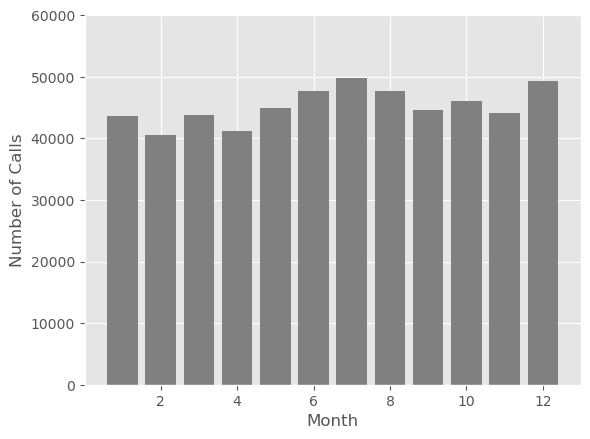

In [139]:
grouped_months = selected_incidents_nona.groupby('Month')['NumCalls'].agg(['sum', 'mean', 'std'])
grouped_months_reset=grouped_months.reset_index()
print(grouped_months_reset.head())
print(grouped_months_reset)
plt.bar(grouped_months_reset['Month'], grouped_months_reset['sum'], color='gray')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.ylim([0000, 60000])
plt.show(plt)

In [161]:
grouped_falseyears = selected_incidents_nona[selected_incidents_nona.groupby("CalYear")["IncidentGroup"== 'False Alarm']].agg(['sum', 'mean', 'std'])
grouped_falseyears_reset=grouped_falseyears.reset_index()
print(grouped_falseyears_reset.head())
print(grouped_falseyears_reset)
plt.bar(grouped_falseyears_reset['CalYear'], grouped_falseyears_reset["IncidentGroup"== 'False Alarm']['sum'], color='gray')
plt.xlabel('Year')
plt.ylabel('False Alarm')
plt.ylim([50000, 175000])
plt.show(plt)

KeyError: 'Column not found: False'

   CalYear      sum      mean       std
0     2009  40360.0  1.169076  0.477587
1     2010  30673.0  1.145412  0.433826
2     2011  27221.0  1.136197  0.445680
3     2012  28113.0  1.129127  0.443989
4     2013  26783.0  1.124675  0.412343
    CalYear      sum      mean       std
0      2009  40360.0  1.169076  0.477587
1      2010  30673.0  1.145412  0.433826
2      2011  27221.0  1.136197  0.445680
3      2012  28113.0  1.129127  0.443989
4      2013  26783.0  1.124675  0.412343
5      2014  25575.0  1.126255  0.406655
6      2015  26639.0  1.137884  0.448783
7      2016  30583.0  1.128941  0.446834
8      2017  29785.0  1.125917  0.435782
9      2018  31696.0  1.139611  0.462490
10     2019  31429.0  1.135236  0.431631
11     2020  29813.0  1.125486  0.415045
12     2021  38779.0  1.132432  0.453562
13     2022  45531.0  1.131655  0.446853
14     2023  46887.0  1.132673  0.414484
15     2024  53271.0  1.134439  0.425117


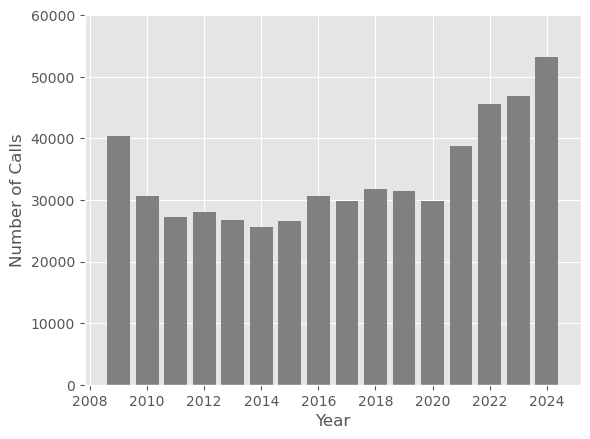

In [171]:
grouped_years = selected_incidents_nona.groupby('CalYear')['NumCalls'].agg(['sum', 'mean', 'std'])
grouped_years_reset=grouped_years.reset_index()
print(grouped_years_reset.head())
print(grouped_years_reset)
plt.bar(grouped_years_reset['CalYear'], grouped_years_reset['sum'], color='gray')
plt.xlabel('Year')
plt.ylabel('Number of Calls')
plt.ylim([0000, 60000])
plt.show(plt)

    Weekday      sum      mean       std
0    Friday  78683.0  1.136069  0.442737
1    Monday  75032.0  1.131465  0.438965
2  Saturday  86152.0  1.135342  0.447947
3    Sunday  81495.0  1.137563  0.446800
4  Thursday  74939.0  1.134494  0.429468
     Weekday      sum      mean       std
0     Friday  78683.0  1.136069  0.442737
1     Monday  75032.0  1.131465  0.438965
2   Saturday  86152.0  1.135342  0.447947
3     Sunday  81495.0  1.137563  0.446800
4   Thursday  74939.0  1.134494  0.429468
5    Tuesday  73700.0  1.134632  0.433808
6  Wednesday  73137.0  1.136585  0.425363


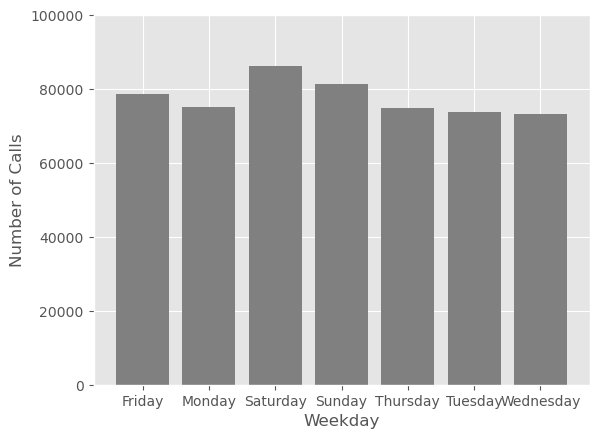

In [177]:
grouped_weekdays = selected_incidents_nona.groupby('Weekday')['NumCalls'].agg(['sum', 'mean', 'std'])
grouped_weekdays_reset=grouped_weekdays.reset_index()
print(grouped_weekdays_reset.head())
print(grouped_weekdays_reset)
plt.bar(grouped_weekdays_reset['Weekday'], grouped_weekdays_reset['sum'], color='gray')
plt.xlabel('Weekday')
plt.ylabel('Number of Calls')
plt.ylim([0000, 100000])
plt.show(plt)

   HourOfCall      sum      mean       std
0           0  18884.0  1.134856  0.430198
1           1  15096.0  1.137604  0.437755
2           2  11987.0  1.140750  0.512788
3           3  10551.0  1.143492  0.435028
4           4   9498.0  1.139395  0.434287
    HourOfCall      sum      mean       std
0            0  18884.0  1.134856  0.430198
1            1  15096.0  1.137604  0.437755
2            2  11987.0  1.140750  0.512788
3            3  10551.0  1.143492  0.435028
4            4   9498.0  1.139395  0.434287
5            5   8643.0  1.153323  0.445754
6            6   9418.0  1.156434  0.464205
7            7  13890.0  1.134526  0.476317
8            8  18335.0  1.129628  0.410225
9            9  21925.0  1.127597  0.396354
10          10  23566.0  1.128802  0.406208
11          11  26225.0  1.132634  0.425897
12          12  27561.0  1.135085  0.443093
13          13  28533.0  1.138269  0.408595
14          14  29144.0  1.141335  0.440068
15          15  30415.0  1.136882  0.4

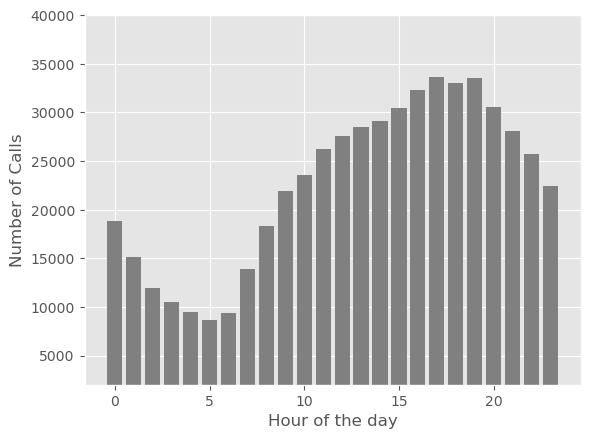

In [179]:
grouped = selected_incidents_nona.groupby('HourOfCall')['NumCalls'].agg(['sum', 'mean', 'std'])
grouped_reset=grouped.reset_index()
print(grouped_reset.head())
print(grouped_reset)
plt.bar(grouped_reset['HourOfCall'], grouped_reset['sum'], color='gray')
plt.ylim([2000, 40000])
plt.xlabel('Hour of the day')
plt.ylabel('Number of Calls')
plt.show(plt)

In [181]:
print(selected_incidents_nona['FirstPumpArriving_AttendanceTime'].isna().sum())
selected_incidents_nona['FirstPumpArrival_min']=selected_incidents_nona['FirstPumpArriving_AttendanceTime']/60
selected_incidents_nona.head()

0


C:\Users\Thesa\AppData\Local\Temp\ipykernel_13440\2910437520.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



IncidentNumber SpecialServiceType DateOfCall  CalYear TimeOfCall  \
0    235138081.00                RTC 2009-01-01     2009   00:00:37   
6         8091.00                RTC 2009-01-01     2009   00:12:31   
11       14091.00           Flooding 2009-01-01     2009   00:17:58   
13       21091.00   Medical Incident 2009-01-01     2009   00:20:43   
15       17091.00       Lift Release 2009-01-01     2009   00:23:38   

    HourOfCall    IncidentGroup StopCodeDescription PropertyCategory  \
0            0  Special Service     Special Service     Road Vehicle   
6            0  Special Service     Special Service     Road Vehicle   
11           0  Special Service     Special Service         Dwelling   
13           0  Special Service     Special Service          Outdoor   
15           0  Special Service     Special Service         Dwelling   

                                         PropertyType  \
0                                                Car    
6                                                Car    
11       Converted Flat/Maisonette - Up to 2 storeys    
13                             Road surface/pavement    
15  Purpose Built Flats/Maisonettes - 4 to 9 storeys    

                         AddressQualifier Postcode_district  \
0   In street close to gazetteer location              SW11   
6             On motorway / elevated road               SE3   
11              Correct incident location               SE5   
13   In street outside gazetteer location                E8   
15              Correct incident location              EC1A   

   IncGeo_BoroughCode                IncGeo_WardName  \
0           E09000032                 Battersea Park   
6           E09000011  Kidbrooke Village & Sutcliffe   
11          E09000028                      St. Giles   
13          E09000012                       Homerton   
15          E09000001              Farringdon Within   

               IncGeo_WardNameNew  Easting_rounded  Northing_rounded     FRS  \
0                  Battersea Park           528650            176850  London   
6   Kidbrooke Village & Sutcliffe           541050            175650  London   
11                      St. Giles           532850            177050  London   
13                       Homerton           534950            184750  London   
15              Farringdon Within           532150            181550  London   

   IncidentStationGround  FirstPumpArriving_AttendanceTime  \
0              Battersea                             319.0   
6              Lee Green                             522.0   
11               Peckham                             256.0   
13              Homerton                              56.0   
15               Dowgate                             696.0   

   FirstPumpArriving_DeployedFromStation  NumStationsWithPumpsAttending  \
0                              Battersea                            2.0   
6                         East Greenwich                            1.0   
11                               Peckham                            1.0   
13                              Homerton                            1.0   
15                               Dowgate                            1.0   

    NumPumpsAttending  PumpCount  PumpMinutesRounded  Notional Cost (£)  \
0                 2.0          2                  60                255   
6                 1.0          1                  60                255   
11                1.0          1                  60                255   
13                1.0          1                  60                255   
15                1.0          1                  60                255   

    NumCalls   Weekday  Month  Day  FirstPumpArrival_min  
0        1.0  Thursday      1    1              5.316667  
6        1.0  Thursday      1    1              8.700000  
11       1.0  Thursday      1    1              4.266667  
13       1.0  Thursday      1    1              0.933333  
15       1.0  Thursday      1    

In [183]:
#binning (bin width=3 h) of single day to detect daytime-dependent effects on London Fire Brigade with regard to mobilisation time.
Midnight=selected_incidents_nona[selected_incidents_nona['HourOfCall'].isin([0,1,2])]
Dawn=selected_incidents_nona[selected_incidents_nona['HourOfCall'].isin([3,4,5])]
Morning=selected_incidents_nona[selected_incidents_nona['HourOfCall'].isin([6,7,8])]
Forenoon=selected_incidents_nona[selected_incidents_nona['HourOfCall'].isin([9,10,11])]
Noon=selected_incidents_nona[selected_incidents_nona['HourOfCall'].isin([12,13,14])]
Afternoon=selected_incidents_nona[selected_incidents_nona['HourOfCall'].isin([15,16,17])]
Evening=selected_incidents_nona[selected_incidents_nona['HourOfCall'].isin([18,19,20])]
Night=selected_incidents_nona[selected_incidents_nona['HourOfCall'].isin([21,22,23])]

In [185]:
print(Midnight['FirstPumpArrival_min'].mean())
print(Dawn['FirstPumpArrival_min'].mean())
print(Morning['FirstPumpArrival_min'].mean())
print(Forenoon['FirstPumpArrival_min'].mean())
print(Noon['FirstPumpArrival_min'].mean())
print(Afternoon['FirstPumpArrival_min'].mean())
print(Evening['FirstPumpArrival_min'].mean())
print(Night['FirstPumpArrival_min'].mean())


5.5881781219588635
5.846575142009551
5.612822018315219
5.412216620716818
5.614459445624064
5.618080391438465
5.3199048018550235
5.142007301070494


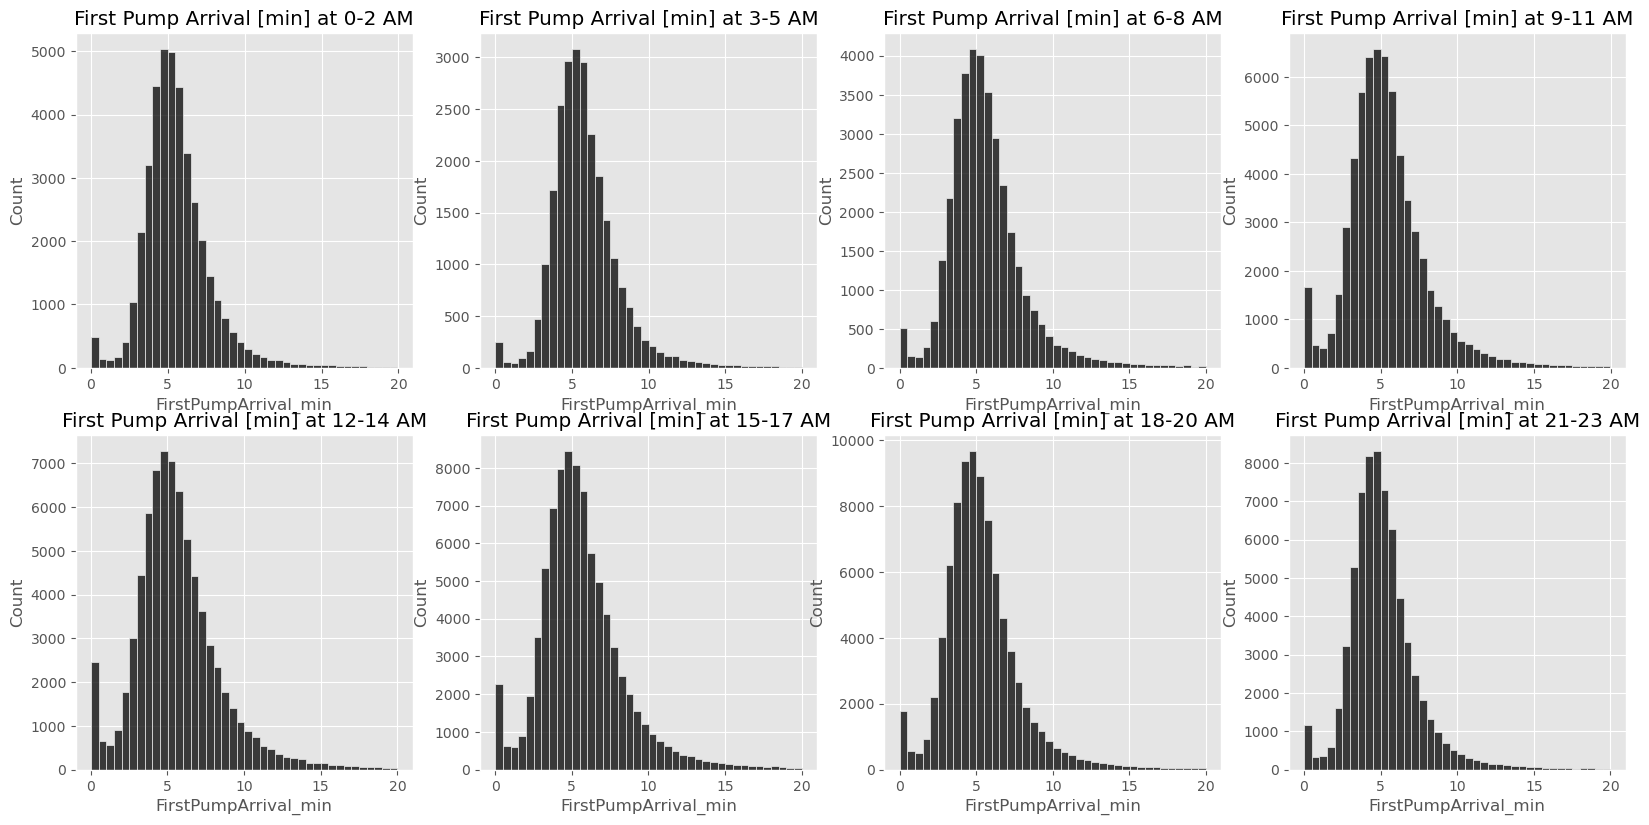

In [187]:
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.histplot(data=Midnight['FirstPumpArrival_min'], binwidth = 0.5, color='black')
plt.title("First Pump Arrival [min] at 0-2 AM")
plt.subplot(4,4,2)
sns.histplot(data=Dawn['FirstPumpArrival_min'], binwidth=0.5, color='black')
plt.title("First Pump Arrival [min] at 3-5 AM")
plt.subplot(4,4,3)
sns.histplot(data=Morning['FirstPumpArrival_min'], binwidth=0.5, color='black')
plt.title("First Pump Arrival [min] at 6-8 AM")
plt.subplot(4,4,4)
sns.histplot(data=Forenoon['FirstPumpArrival_min'], binwidth=0.5, color='black')
plt.title("First Pump Arrival [min] at 9-11 AM")
plt.subplot(4,4,5)
sns.histplot(data=Noon['FirstPumpArrival_min'], binwidth=0.5, color='black')
plt.title("First Pump Arrival [min] at 12-14 AM")
plt.subplot(4,4,6)
sns.histplot(data=Afternoon['FirstPumpArrival_min'], binwidth=0.5, color='black')
plt.title("First Pump Arrival [min] at 15-17 AM")
plt.subplot(4,4,7)
sns.histplot(data=Evening['FirstPumpArrival_min'], binwidth=0.5, color='black')
plt.title("First Pump Arrival [min] at 18-20 AM")
plt.subplot(4,4,8)
sns.histplot(data=Night['FirstPumpArrival_min'], binwidth=0.5, color='black')
plt.title("First Pump Arrival [min] at 21-23 AM")
plt.show(sns)

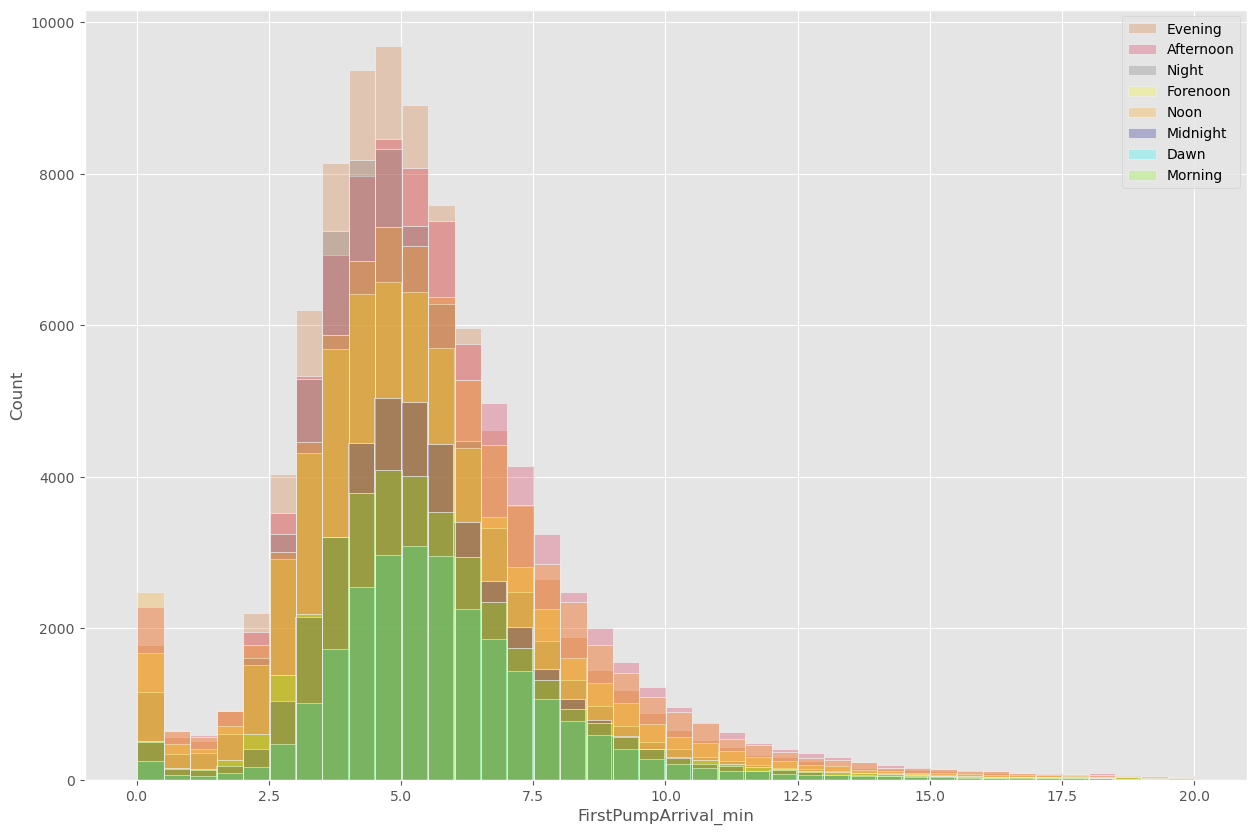

In [191]:
plt.figure(figsize=(15,10))
sns.histplot(data=Evening['FirstPumpArrival_min'], binwidth=0.5, alpha=0.25, color = 'chocolate', label="Evening")
sns.histplot(data=Afternoon['FirstPumpArrival_min'], binwidth=0.5, alpha=0.25, color='crimson', label = "Afternoon")
sns.histplot(data=Night['FirstPumpArrival_min'], binwidth=0.5, alpha=0.25, color='dimgray', label = "Night")
sns.histplot(data=Forenoon['FirstPumpArrival_min'], binwidth=0.5, alpha=0.25, color='yellow', label = "Forenoon")
sns.histplot(data=Noon['FirstPumpArrival_min'], binwidth=0.5, alpha=0.25, color='orange', label = "Noon")
sns.histplot(data=Midnight['FirstPumpArrival_min'], binwidth = 0.5, alpha=0.25, color='navy', label = "Midnight")
sns.histplot(data=Dawn['FirstPumpArrival_min'], binwidth=0.5, alpha=0.25, color='cyan', label = "Dawn")
sns.histplot(data=Morning['FirstPumpArrival_min'], binwidth=0.5, alpha=0.25, color='lawngreen', label = "Morning")
plt.legend()
plt.show(sns)
#Very preliminary conclusion: Time of the day has a minor impact on mobilisation time.

<Figure size 400x400 with 0 Axes>

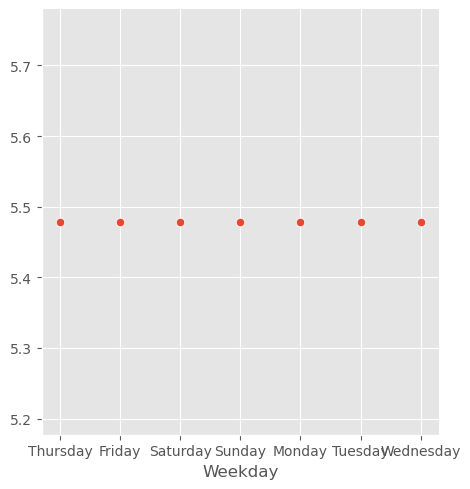

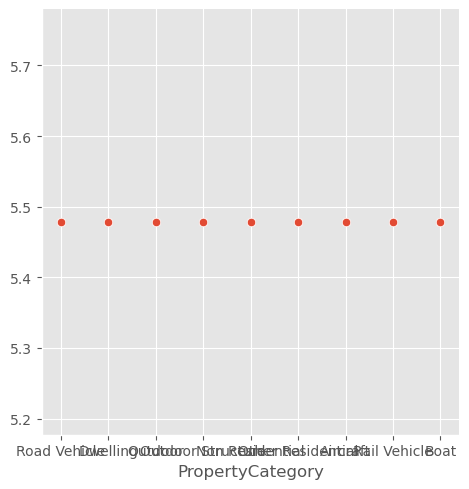

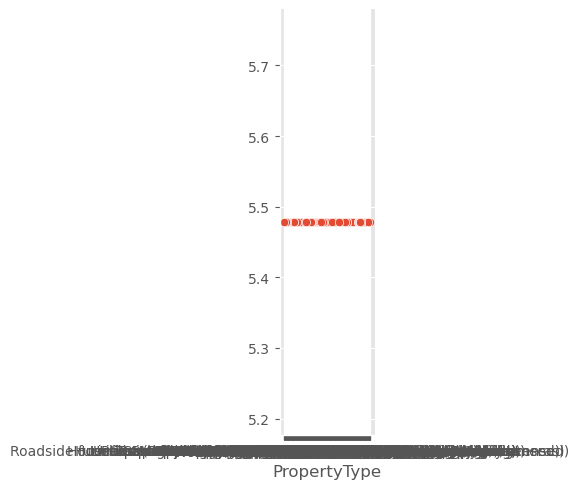

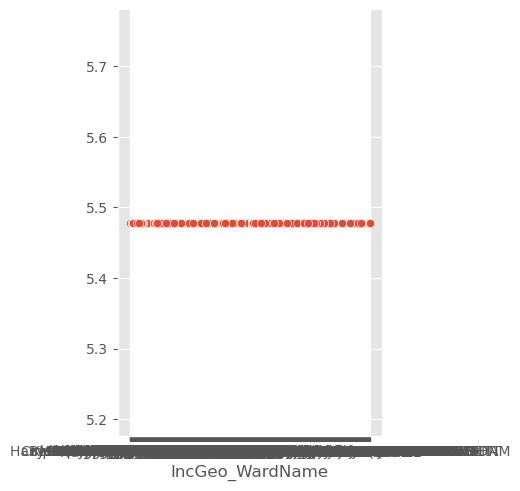

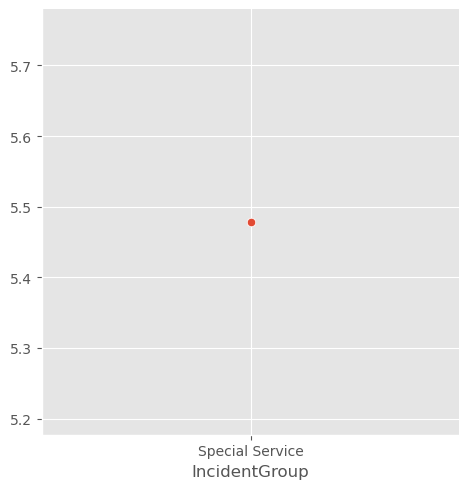

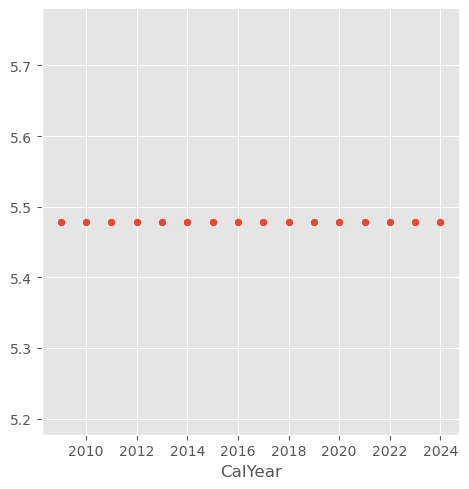

In [199]:
###PLEASE NOTE THAT I MADE A MISTAKE THERE...
#Please find correct graphs at the bottom of notebook.
#Visualization of potential weekday-, property type-, fire ward- and incident group-dependent differences in mobilisation times.
plt.figure(figsize=(4, 4))
sns.relplot(x=selected_incidents_nona['Weekday'], y=selected_incidents_nona['FirstPumpArrival_min'].mean())

sns.relplot(x=selected_incidents_nona['PropertyCategory'], y=selected_incidents_nona['FirstPumpArrival_min'].mean())

sns.relplot(x=selected_incidents_nona['PropertyType'], y=selected_incidents_nona['FirstPumpArrival_min'].mean())

sns.relplot(x=selected_incidents_nona['IncGeo_WardName'], y=selected_incidents_nona['FirstPumpArrival_min'].mean())

sns.relplot(x=selected_incidents_nona['IncidentGroup'], y=selected_incidents_nona['FirstPumpArrival_min'].mean())

sns.relplot(x=selected_incidents_nona['CalYear'], y=selected_incidents_nona['FirstPumpArrival_min'].mean())

plt.show(sns)

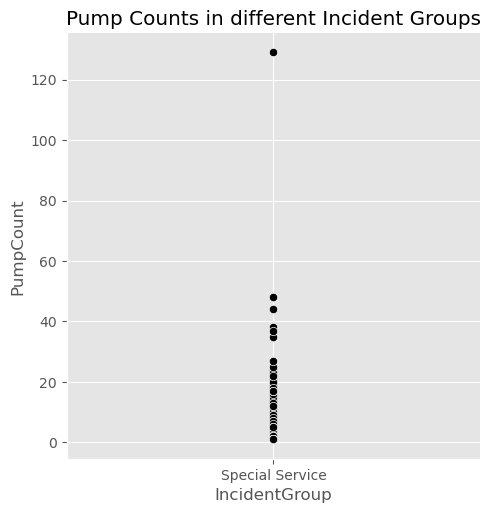

In [200]:
#Visualisation of incident type-dependent pump count variability
sns.relplot(x=selected_incidents_nona['IncidentGroup'], y=selected_incidents_nona['PumpCount'], color='black')
plt.title("Pump Counts in different Incident Groups")
plt.show(sns)

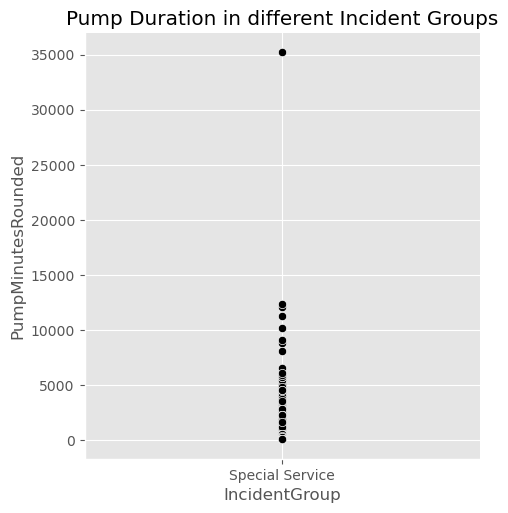

In [203]:
sns.relplot(x=selected_incidents_nona['IncidentGroup'], y=selected_incidents_nona['PumpMinutesRounded'], color='black')
plt.title("Pump Duration in different Incident Groups")
plt.show(sns)

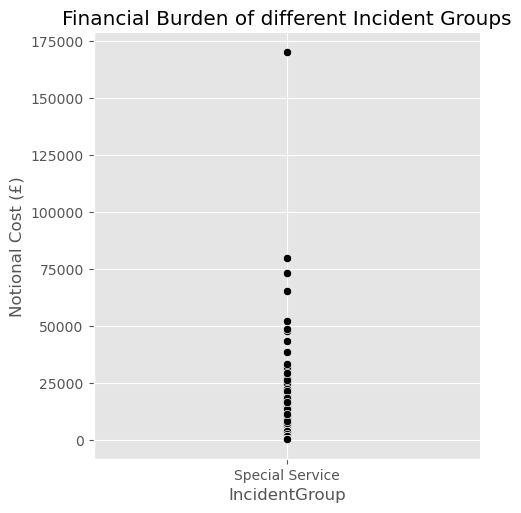

In [204]:
#Visualization of incident-dependent financial burden
sns.relplot(x=selected_incidents_nona['IncidentGroup'], y=selected_incidents_nona['Notional Cost (£)'], color='black')
plt.title("Financial Burden of different Incident Groups")
plt.show(sns)

    PropertyCategory  FirstPumpArrival_min
0           Aircraft              5.224176
1               Boat              6.023387
2           Dwelling              5.565231
3    Non Residential              4.802455
4  Other Residential              5.300297
5            Outdoor              5.409204
6  Outdoor Structure              5.630429
7       Rail Vehicle              4.679586
8       Road Vehicle              5.506000


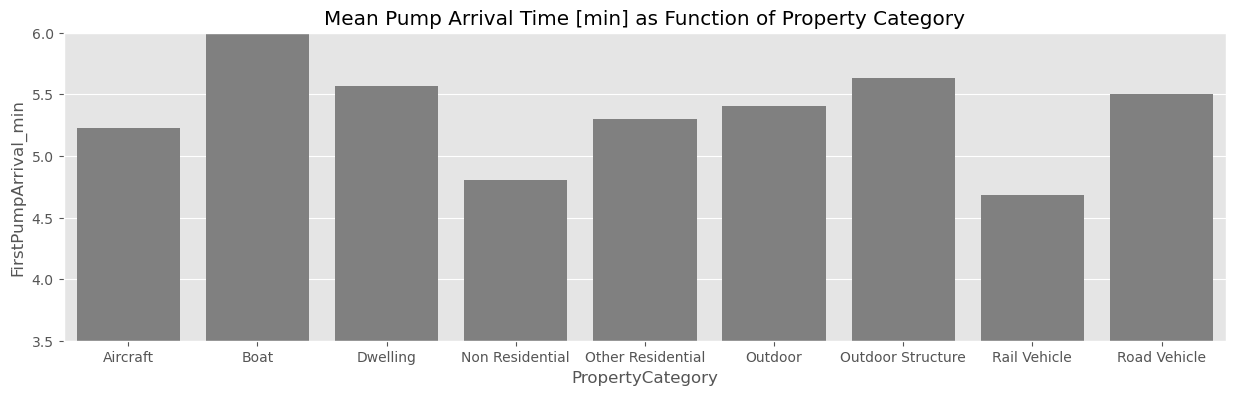

In [207]:
Pump_Property=selected_incidents_nona[['FirstPumpArrival_min', 'PropertyCategory']].groupby('PropertyCategory').mean()
Pump_Property_reset=Pump_Property.reset_index()
print(Pump_Property_reset)
plt.figure(figsize=(15,4))
sns.barplot(x=Pump_Property_reset['PropertyCategory'], y=Pump_Property_reset['FirstPumpArrival_min'], color = 'gray')
plt.ylim(3.5,6)
plt.title("Mean Pump Arrival Time [min] as Function of Property Category")
plt.show(sns)

    CalYear  FirstPumpArrival_min
0      2009              5.656732
1      2010              5.708461
2      2011              5.499711
3      2012              5.523805
4      2013              5.450722
5      2014              5.616640
6      2015              5.704474
7      2016              5.523597
8      2017              5.327514
9      2018              5.377351
10     2019              5.349019
11     2020              5.183333
12     2021              5.351126
13     2022              5.400258
14     2023              5.458819
15     2024              5.555402


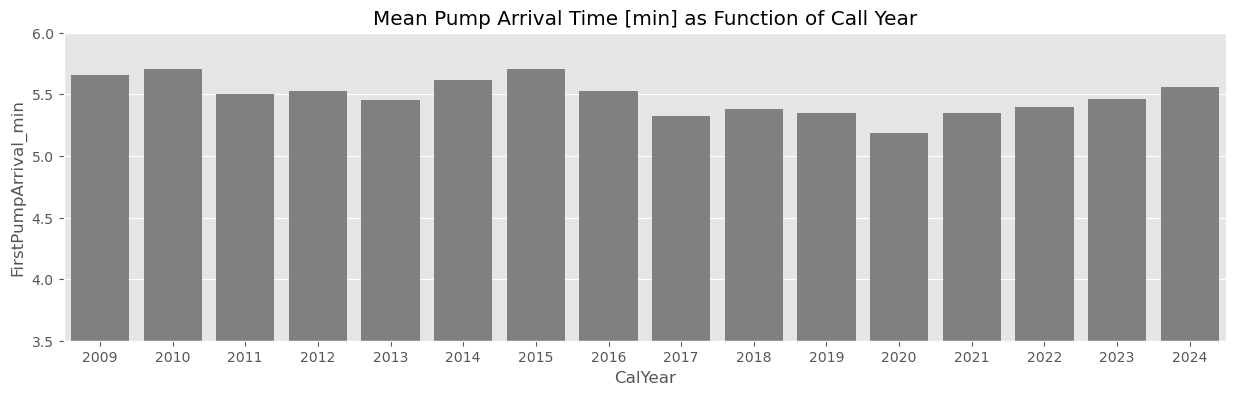

In [209]:
Pump_Year=selected_incidents_nona[['FirstPumpArrival_min', 'CalYear']].groupby('CalYear').mean()
Pump_Year_reset=Pump_Year.reset_index()
print(Pump_Year_reset)
plt.figure(figsize=(15,4))
sns.barplot(x=Pump_Year_reset['CalYear'], y=Pump_Year_reset['FirstPumpArrival_min'], color = 'gray')
plt.ylim(3.5,6)
plt.title("Mean Pump Arrival Time [min] as Function of Call Year")
plt.show(sns)

     Weekday  FirstPumpArrival_min
0     Friday              5.540690
1     Monday              5.445089
2   Saturday              5.474936
3     Sunday              5.365050
4   Thursday              5.512237
5    Tuesday              5.504618
6  Wednesday              5.515674


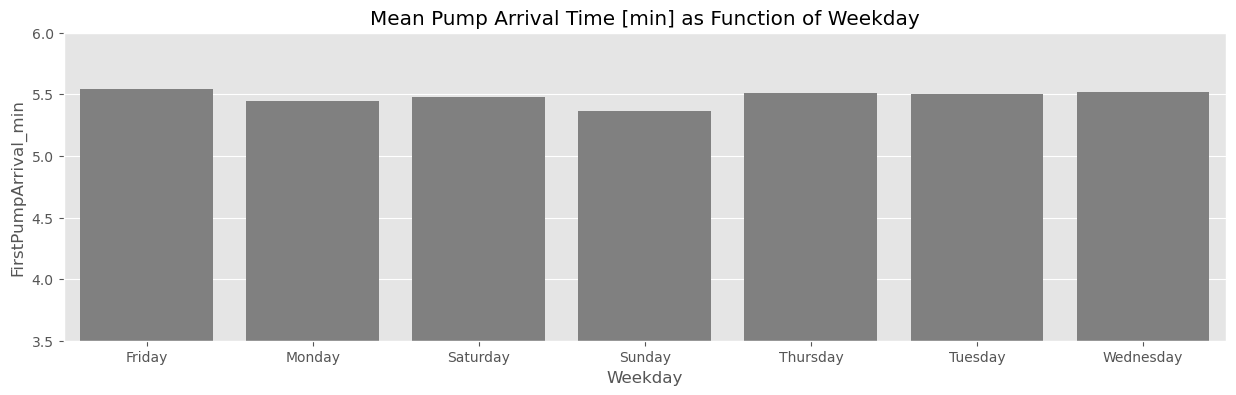

In [211]:
Pump_Weekday=selected_incidents_nona[['FirstPumpArrival_min', 'Weekday']].groupby('Weekday').mean()
Pump_Weekday_reset=Pump_Weekday.reset_index()
print(Pump_Weekday_reset)
plt.figure(figsize=(15,4))
sns.barplot(x=Pump_Weekday_reset['Weekday'], y=Pump_Weekday_reset['FirstPumpArrival_min'], color = 'gray')
plt.ylim(3.5,6)
plt.title("Mean Pump Arrival Time [min] as Function of Weekday")
plt.show(sns)

    HourOfCall  FirstPumpArrival_min
0            0              5.408961
1            1              5.641895
2            2              5.804141
3            3              5.861199
4            4              5.824886
5            5              5.852695
6            6              6.052087
7            7              5.636975
8            8              5.374200
9            9              5.206841
10          10              5.379948
11          11              5.613780
12          12              5.613161
13          13              5.573818
14          14              5.655590
15          15              5.654962
16          16              5.607748
17          17              5.594613
18          18              5.500521
19          19              5.295275
20          20              5.152881
21          21              5.131583
22          22              5.111278
23          23              5.190381


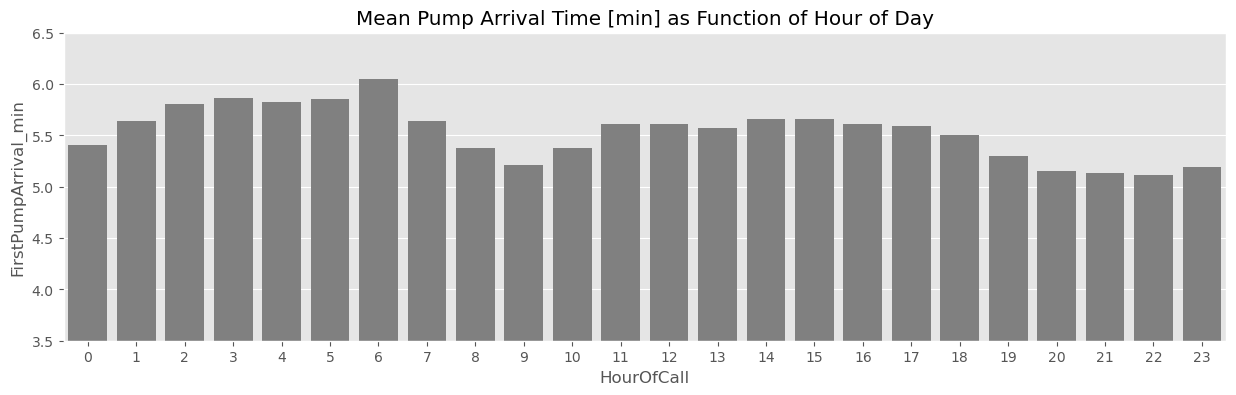

In [237]:
Pump_Hour=selected_incidents_nona[['FirstPumpArrival_min', 'HourOfCall']].groupby('HourOfCall').mean()
Pump_Hour_reset=Pump_Hour.reset_index()
print(Pump_Hour_reset)
plt.figure(figsize=(15,4))
sns.barplot(x=Pump_Hour_reset['HourOfCall'], y=Pump_Hour_reset['FirstPumpArrival_min'], color = 'gray')
plt.ylim(3.5,6.5)
plt.title("Mean Pump Arrival Time [min] as Function of Hour of Day")
plt.show(sns)

    Month  FirstPumpArrival_min
0       1              5.489305
1       2              5.536888
2       3              5.452922
3       4              5.333572
4       5              5.355129
5       6              5.468430
6       7              5.482964
7       8              5.388050
8       9              5.471540
9      10              5.550449
10     11              5.599373
11     12              5.597993


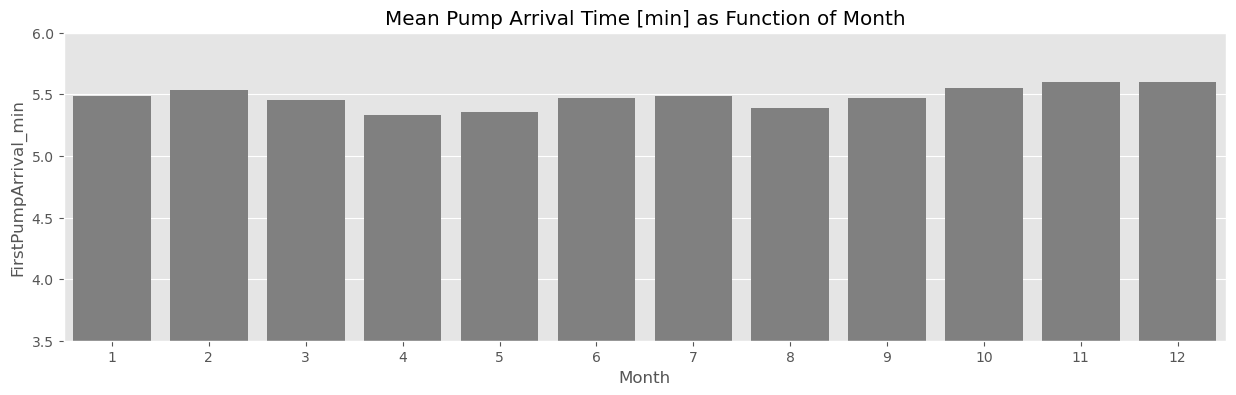

In [215]:
Pump_Month=selected_incidents_nona[['FirstPumpArrival_min', 'Month']].groupby('Month').mean()
Pump_Month_reset=Pump_Month.reset_index()
print(Pump_Month_reset)
plt.figure(figsize=(15,4))
sns.barplot(x=Pump_Month_reset['Month'], y=Pump_Month_reset['FirstPumpArrival_min'], color = 'gray')
plt.ylim(3.5,6)
plt.title("Mean Pump Arrival Time [min] as Function of Month")
plt.show(sns)

     IncidentGroup  FirstPumpArrival_min
0  Special Service              5.478522


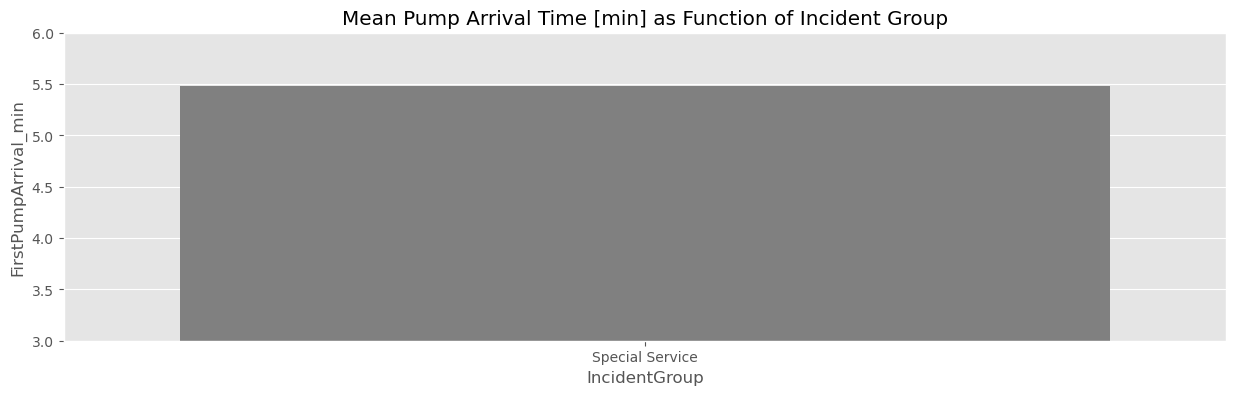

In [219]:
Pump_Incident=selected_incidents_nona[['FirstPumpArrival_min', 'IncidentGroup']].groupby('IncidentGroup').mean()
Pump_Incident_reset=Pump_Incident.reset_index()
print(Pump_Incident_reset)
plt.figure(figsize=(15,4))
sns.barplot(x=Pump_Incident_reset['IncidentGroup'], y=Pump_Incident_reset['FirstPumpArrival_min'], color = 'gray')
plt.ylim(3.,6)
plt.title("Mean Pump Arrival Time [min] as Function of Incident Group")
plt.show(sns)

In [221]:
num_var = selected_incidents_nona[['CalYear', 'HourOfCall', 'NumCalls', 'PumpMinutesRounded', 'FirstPumpArrival_min', 'PumpCount', 'Notional Cost (£)']]

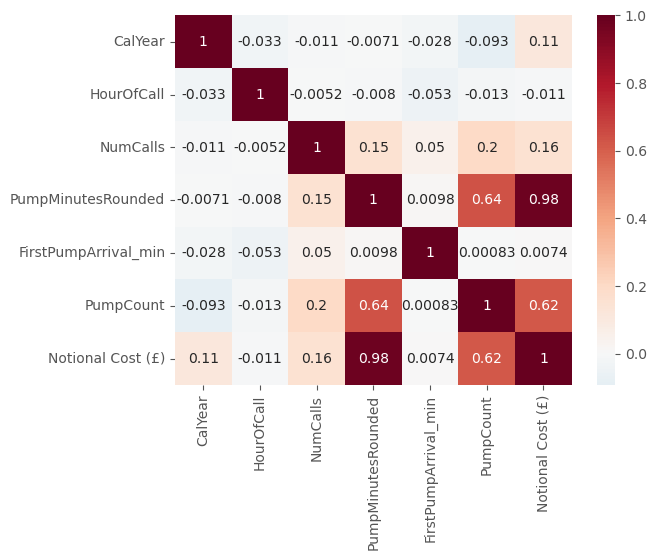

In [223]:
sns.heatmap(num_var.corr(), annot=True, cmap="RdBu_r", center =0)
plt.show(sns)

In [225]:
all_incidents_nona=all_incidents.dropna()

In [226]:
all_incidents_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27969 entries, 148 to 804971
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   IncidentNumber                          27969 non-null  object        
 1   DateOfCall                              27969 non-null  datetime64[ns]
 2   CalYear                                 27969 non-null  int64         
 3   TimeOfCall                              27969 non-null  object        
 4   HourOfCall                              27969 non-null  int64         
 5   IncidentGroup                           27969 non-null  object        
 6   StopCodeDescription                     27969 non-null  object        
 7   SpecialServiceType                      27969 non-null  object        
 8   PropertyCategory                        27969 non-null  object        
 9   PropertyType                            27969 non-nu

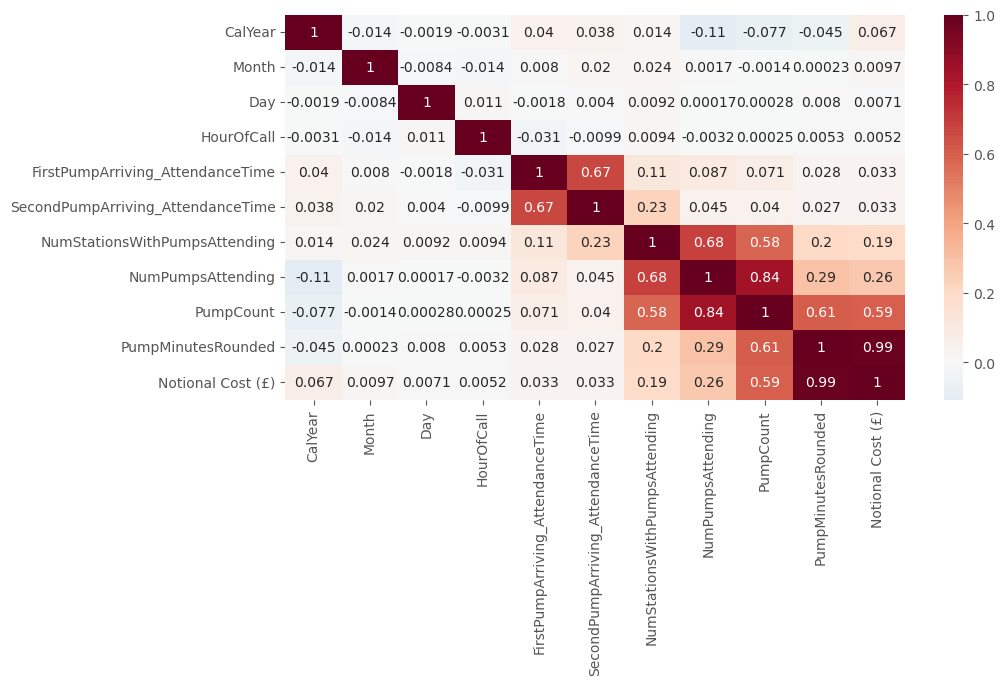

In [247]:
plt.figure(figsize=(10,5))
sns.heatmap(all_incidents_nona[['CalYear', 'Month', 'Day', 'HourOfCall', 'FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'PumpMinutesRounded', 'Notional Cost (£)']].corr(), annot=True, cmap="RdBu_r", center =0)
plt.show(sns)

In [249]:
all_incidents_nona['FirstPumpArrival_min']=all_incidents_nona['FirstPumpArriving_AttendanceTime']/60
all_incidents_nona['SecondPumpArrival_min']=all_incidents_nona['FirstPumpArriving_AttendanceTime']/60

all_incidents_nona.head()

C:\Users\Thesa\AppData\Local\Temp\ipykernel_13440\421325163.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Thesa\AppData\Local\Temp\ipykernel_13440\421325163.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall  \
148       268091.00 2009-01-01     2009   08:28:54           8   
165       305091.00 2009-01-01     2009   10:09:14          10   
473       822091.00 2009-01-02     2009   09:57:18           9   
1034     1782091.00 2009-01-03     2009   21:02:47          21   
1037     1791091.00 2009-01-03     2009   21:12:57          21   

        IncidentGroup StopCodeDescription           SpecialServiceType  \
148   Special Service     Special Service  No action (not false alarm)   
165   Special Service     Special Service         Effecting entry/exit   
473   Special Service     Special Service  No action (not false alarm)   
1034  Special Service     Special Service   Spills and Leaks (not RTC)   
1037  Special Service     Special Service                          RTC   

     PropertyCategory            PropertyType  \
148           Outdoor                Railway    
165   Non Residential   Purpose built office    
473           Outdoor  Road surface/pavement    
1034  Non Residential    Underground car park   
1037     Road Vehicle              Bus/coach    

                      AddressQualifier Postcode_full Postcode_district  \
148   On land associated with building       W12 7RH               W12   
165               Within same building      EC1A 4HU              EC1A   
473          Correct incident location      SE22 8PS              SE22   
1034              Within same building      SW1P 2TA              SW1P   
1037         Correct incident location       E16 4TG               E16   

              UPRN        USRN IncGeo_BoroughCode      IncGeo_BoroughName  \
148   1.009185e+10  21000894.0          E09000013  HAMMERSMITH AND FULHAM   
165   9.550044e+07   8100010.0          E09000001          CITY OF LONDON   
473   2.000034e+11  22500852.0          E09000028               SOUTHWARK   
1034  1.000233e+11   8401412.0          E09000033             WESTMINSTER   
1037  1.000900e+10  22201541.0          E09000025                  NEWHAM   

                  ProperCase IncGeo_WardCode         IncGeo_WardName  \
148   Hammersmith And fulham       E05013736  College Park & Old Oak   
165           City Of london       E05009304       Farringdon Within   
473                Southwark       E05011103             Goose Green   
1034             Westminster       E05013806             St. James's   
1037                  Newham       E05013906      Canning Town North   

          IncGeo_WardNameNew  Easting_m  Northing_m  Easting_rounded  \
148   College Park & Old Oak   523323.0    180729.0           523350   
165        Farringdon Within   532121.0    181639.0           532150   
473              Goose Green   533556.0    175119.0           533550   
1034             St. James's   529743.0    179049.0           529750   
1037      Canning Town North   538912.0    182190.0           538950   

      Northing_rounded   Latitude  Longitude     FRS IncidentStationGround  \
148             180750  51.512039  -0.224227  London           Hammersmith   
165             181650  51.518230  -0.097173  London            Shoreditch   
473             175150  51.459300  -0.078968  London               Peckham   
1034            179050  51.495505  -0.132379  London               Lambeth   
1037            182150  51.521553   0.000858  London                Poplar   

      FirstPumpArriving_AttendanceTime FirstPumpArriving_DeployedFromStation  \
148                              240.0                      North Kensington   
165                              185.0                            Shoreditch   
473                              424.0                          West Norwood   
1034                             218.0                               Lambeth   
1037                             336.0                                Poplar   

      SecondPumpArriving_AttendanceTime  \
148                               255.0   
165                               364.0   
473            

In [251]:
all_incidents_nona['SpecialServiceType'].value_counts().head(10)


SpecialServiceType
RTC                                16798
No action (not false alarm)         2260
Hazardous Materials incident        1528
Other Transport incident            1035
Assist other agencies               1012
Other rescue/release of persons      862
Suicide/attempts                     833
Making Safe (not RTC)                548
Rescue or evacuation from water      430
Stand By                             422
Name: count, dtype: int64

                 SpecialServiceType  FirstPumpArrival_min
0                       Advice Only              5.071219
1       Animal assistance incidents              6.013667
2             Assist other agencies              5.201268
3              Effecting entry/exit              4.952421
4              Evacuation (no fire)              5.063393
5                          Flooding              5.058478
6      Hazardous Materials incident              5.109435
7                      Lift Release              4.452525
8             Making Safe (not RTC)              5.140268
9                  Medical Incident              4.434612
10  Medical Incident - Co-responder              4.177083
11      No action (not false alarm)              5.460804
12         Other Transport incident              4.993671
13  Other rescue/release of persons              5.009590
14                              RTC              5.424901
15   Removal of objects from people              5.099245
16  Rescue or 

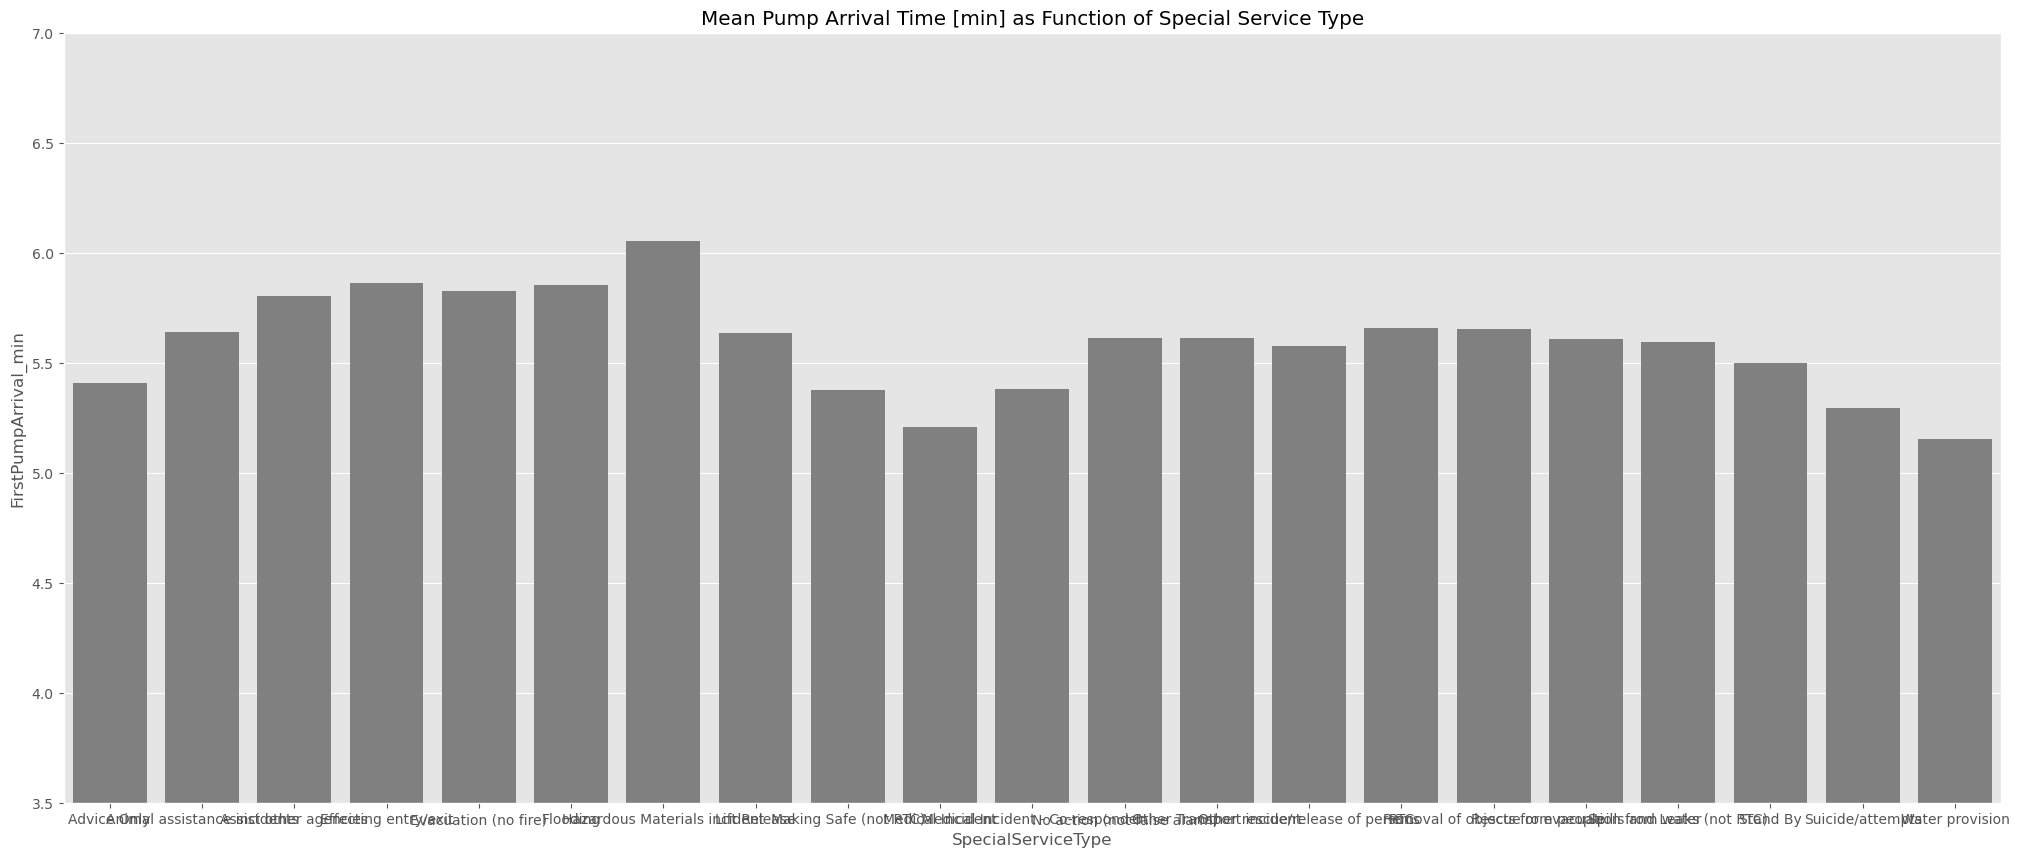

In [255]:
Pump_Service=all_incidents_nona[['FirstPumpArrival_min', 'SpecialServiceType']].groupby('SpecialServiceType').mean()
Pump_Service_reset=Pump_Service.reset_index()
print(Pump_Service_reset)
plt.figure(figsize=(25,10))
sns.barplot(x=Pump_Service_reset['SpecialServiceType'], y=Pump_Hour_reset['FirstPumpArrival_min'], color = 'gray', orient='v')
plt.ylim(3.5,7)
plt.title("Mean Pump Arrival Time [min] as Function of Special Service Type")
plt.show(sns)